# Mathematical Considerations

In order to define the best predictive model in the frame of our project, we'll use some scoring metrics for each model.
We are using **regression** models to predict our output because we work with continuous data.

The **Mean Squared Error**, **Mean Absolute error**, **Root Mean Squared Error**, and **R-Squared or Coefficient of determination** metrics are used to evaluate the performance of the model in regression analysis.

**Mean Absolute Error** represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

<div style="width:100%;text-align: center;">
<img align=middle src="https://i.imgur.com/BmBC8VW.jpg" width="350"/>
    
 
**Mean Squared Error** represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

<div style="width:100%;text-align: center;">
<img align=middle src="https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/11/Differences-between-MSE-and-RMSE-1-i2tutorials.jpg" width="330"/>
    
 
**Root Mean Squared Error** is the **square root of Mean Squared error**. It measures the standard deviation of residuals.
 
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png" width="300"/>
   

**The coefficient of determination or R-squared** represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.
    
<div style="width:100%;text-align: center;">
<img align=middle src="https://miro.medium.com/max/1400/0*8rFYfZJfJZpW2cEV.png" width="440"/>

# Set up Environment

We import all the relevant librairies to display our models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore") # ignore the warnings about file size
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
from time import process_time

# calling our libraries for our models

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from math import sqrt
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.model_selection import validation_curve
from sklearn import preprocessing
from sklearn.dummy import DummyRegressor


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
# set option to be able to get each column and row of our dataframes
pd.set_option("display.max_columns", None)
data = pd.read_csv('/Users/mike.narbo/Documents/[OC] - Machine Learning/P3/clean_p3 (1).csv',sep='\t', low_memory=False, index_col=[0])
data.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3353,50090,2016,Multifamily MR (5-9),Mid-Rise Multifamily,131910 - LIV Seattle,4717 Brooklyn Ave NE,Seattle,WA,98105.0,8817400110,4,NORTHEAST,47.66366,-122.31450,2015,1.0,7,63825,4850,58975,Multifamily Housing,Multifamily Housing,71241.0,99.0,32.799999,35.000000,78.599998,85.400002,2.337651e+06,2.689826,0.0,4.407752e+05,1503925.0,8337.259766,833726.0,False,Compliant,54.76,0.86
3354,50092,2016,Multifamily MR (5-9),Residence Hall,Terry Hall & Maple Hall,1101 NE Campus Pkwy,Seattle,WA,98195.0,1142002345,4,NORTHEAST,47.65577,-122.31702,2015,1.0,7,325000,0,325000,Residence Hall/Dormitory,Residence Hall/Dormitory,325000.0,69.0,50.700001,53.599998,109.900002,113.000000,1.646749e+07,2.813833,0.0,2.583406e+06,8814581.0,76529.031250,7652903.0,False,Compliant,467.90,1.44
3355,50093,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Raven Terrace,820 Yesler Way,Seattle,WA,98104.0,9822000080,3,EAST,47.60189,-122.32182,2015,1.0,6,86045,8908,77137,"Multifamily Housing, Other - Public Services, ...",Multifamily Housing,78359.0,84.0,27.100000,27.100000,85.099998,85.099998,2.161240e+06,2.680075,0.0,6.334232e+05,2161240.0,0.000000,0.0,False,Compliant,15.07,0.18
3357,50095,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Broadstone Sky,4745 40th Ave SW,Seattle,WA,98116.0,7579200395,1,SOUTHWEST,47.55976,-122.38320,2015,1.0,7,208136,58818,149318,"Multifamily Housing, Parking",Multifamily Housing,168221.0,100.0,21.100000,21.100000,46.900002,46.900002,3.552185e+06,2.713573,0.0,5.828756e+05,1988772.0,15634.129880,1563413.0,False,Compliant,96.90,0.47
3358,50098,2016,Multifamily LR (1-4),Low-Rise Multifamily,1806,1806 23rd Avenue,Seattle,WA,98122.0,1407300010,3,CENTRAL,47.61791,-122.30230,2014,1.0,4,20246,2580,17666,Multifamily Housing,Multifamily Housing,17666.0,99.0,44.700001,45.000000,106.099998,106.400002,7.898472e+05,2.609067,0.0,1.465200e+05,499926.0,2899.209961,289921.0,False,Compliant,18.88,0.93


# Convert Continuous Variables into Discrete Values

At the difference of LabelEncoder(), **OneHotEncoder()** does not create a hierarchy in the numerical values. In our case, we don't have hierarchy in our modalities, so we'll definitely use this class to convert the string into numerical values. 

We're going to use on the categorical variables that did interest us during the exploratory phase:

- BuildingType
- PrimaryPropertyType
- Neighborhood

In [3]:
enc = data[['BuildingType','PrimaryPropertyType','Neighborhood']]
data = data.drop(columns=['BuildingType','PrimaryPropertyType','Neighborhood'])

In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

# passing our categorical columns (label encoded values)

categorical_features = pd.DataFrame(encoder.fit_transform(enc))

# label the encoded columns with the features of the original variables

categorical_features.columns = encoder.get_feature_names(['BuildingType','PrimaryPropertType','Neighborhood'])

# merge with main dataframe

enc_data = data.join(categorical_features, how="inner")
enc_data

,OSEBuildingID,DataYear,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,1,2016,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,2.761569,2003882.00,1.156514e+06,3946027.0,12764.529300,1276453.0,False,Compliant,249.98,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2016,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,2.771009,0.00,9.504252e+05,3242851.0,51450.816410,5145082.0,False,Compliant,295.86,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2016,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,2.896946,21566554.00,1.451544e+07,49526664.0,14938.000000,1493800.0,False,Compliant,2089.28,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,2016,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,2.757081,2214446.25,8.115253e+05,2768924.0,18112.130860,1811213.0,False,Compliant,286.43,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2016,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,

# Features and Predictive Variable for CO2 Emissions

We import our features in a dataframe called X which will contain all the numerical (discrete) variables that do predict our predictive variable.

As predictive variable to predict the total CO2 emissions of a property in Seattle, we decide to pick *TotalGHGEmissions* that seems the most representative of our real case study, which means that the lower *TotalGHGEmissions* is, the lower the consumption of the building will be.

*TotalGHGEmissions* is contained in our y dataframe for predictions

In [5]:
# Create the dataframe that will contain all our features for modeling

X = pd.concat([enc_data.loc[:,'PropertyGFATotal':'PropertyGFABuilding(s)'],enc_data.loc[:,'LargestPropertyUseTypeGFA':'NaturalGas(kBtu)'],enc_data.loc[:,'GHGEmissionsIntensity':'Neighborhood_SOUTHWEST']],1).copy()
X = pd.DataFrame(X)
X.head()

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissionsIntensity,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,88434,0,88434,88434.0,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,2.761569,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,2.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,103566,15064,88502,83880.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,2.771009,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,2.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,956110,196718,759392,756493.0,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,2.896946,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2.19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61320,0,61320,61320.0,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,2.757081,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,4.67,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,175580,62000,113580,123445.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,2.803384,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,2.88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y = enc_data.loc[:,'TotalGHGEmissions']
y = pd.DataFrame(y).astype('int32')

# Correlation Matrix

We re-insert our correlation matrix from our exploratory phase because we notice some overfitting between our test and training datasets while creating the models.

We're working on predicting the variable *TotalGHGEmissions* so we want to define a threshold by which we'll not take in consideration the variables in our X features to not give too many degrees of freedom to our models.

By observing the correlation matrix, we gather the variables that are correlated to our predictive variable with a correlation above 40%.

- PropertyGFATotal
- PropertyGFABuilding(s)
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SiteEnergyUseWN(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- Electricity(kBtu)
- NaturalGas(therms)
- NaturalGas(kBtu)
- GHGEmissionsIntensity

From this list, we also notice that some variables are highly correlated between them such as:

- **PropertyGFATotal**, **PropertyGFABuilding(s)** and **LargestPropertyUseTypeGFA**
- **SiteEnergyUse(kBtu)** and **SiteEnergyUseWN(kBtu)**
- **Electricity(kWh)** and **Electricity(kBtu)**
- **NaturalGas(therms)** and **NaturalGas(kBtu)**

We decide to keep **PropertyGFABuilding(s)** because it get a more accurate description of the building GFA and drop the two other correlated variables.
We decide to keep  **SiteEnergyUseWN(kBtu)** over SiteEnergyUse(kBtu).
We decide to keep the **Electricity(kBtu)** and **NaturalGas(kBtu)** because of there are measured in the same units so we keep a certain homogeneity in our data.

Finally, we decide to drop the following variables that are too coreelated to one another:

- PropertyGFATotal
- LargestPropertyUseTypeGFA
- SiteEnergyUse(kBtu)
- SteamUse(kBtu)
- Electricity(kWh)
- NaturalGas(therms)
- GHGEmissionsIntensity

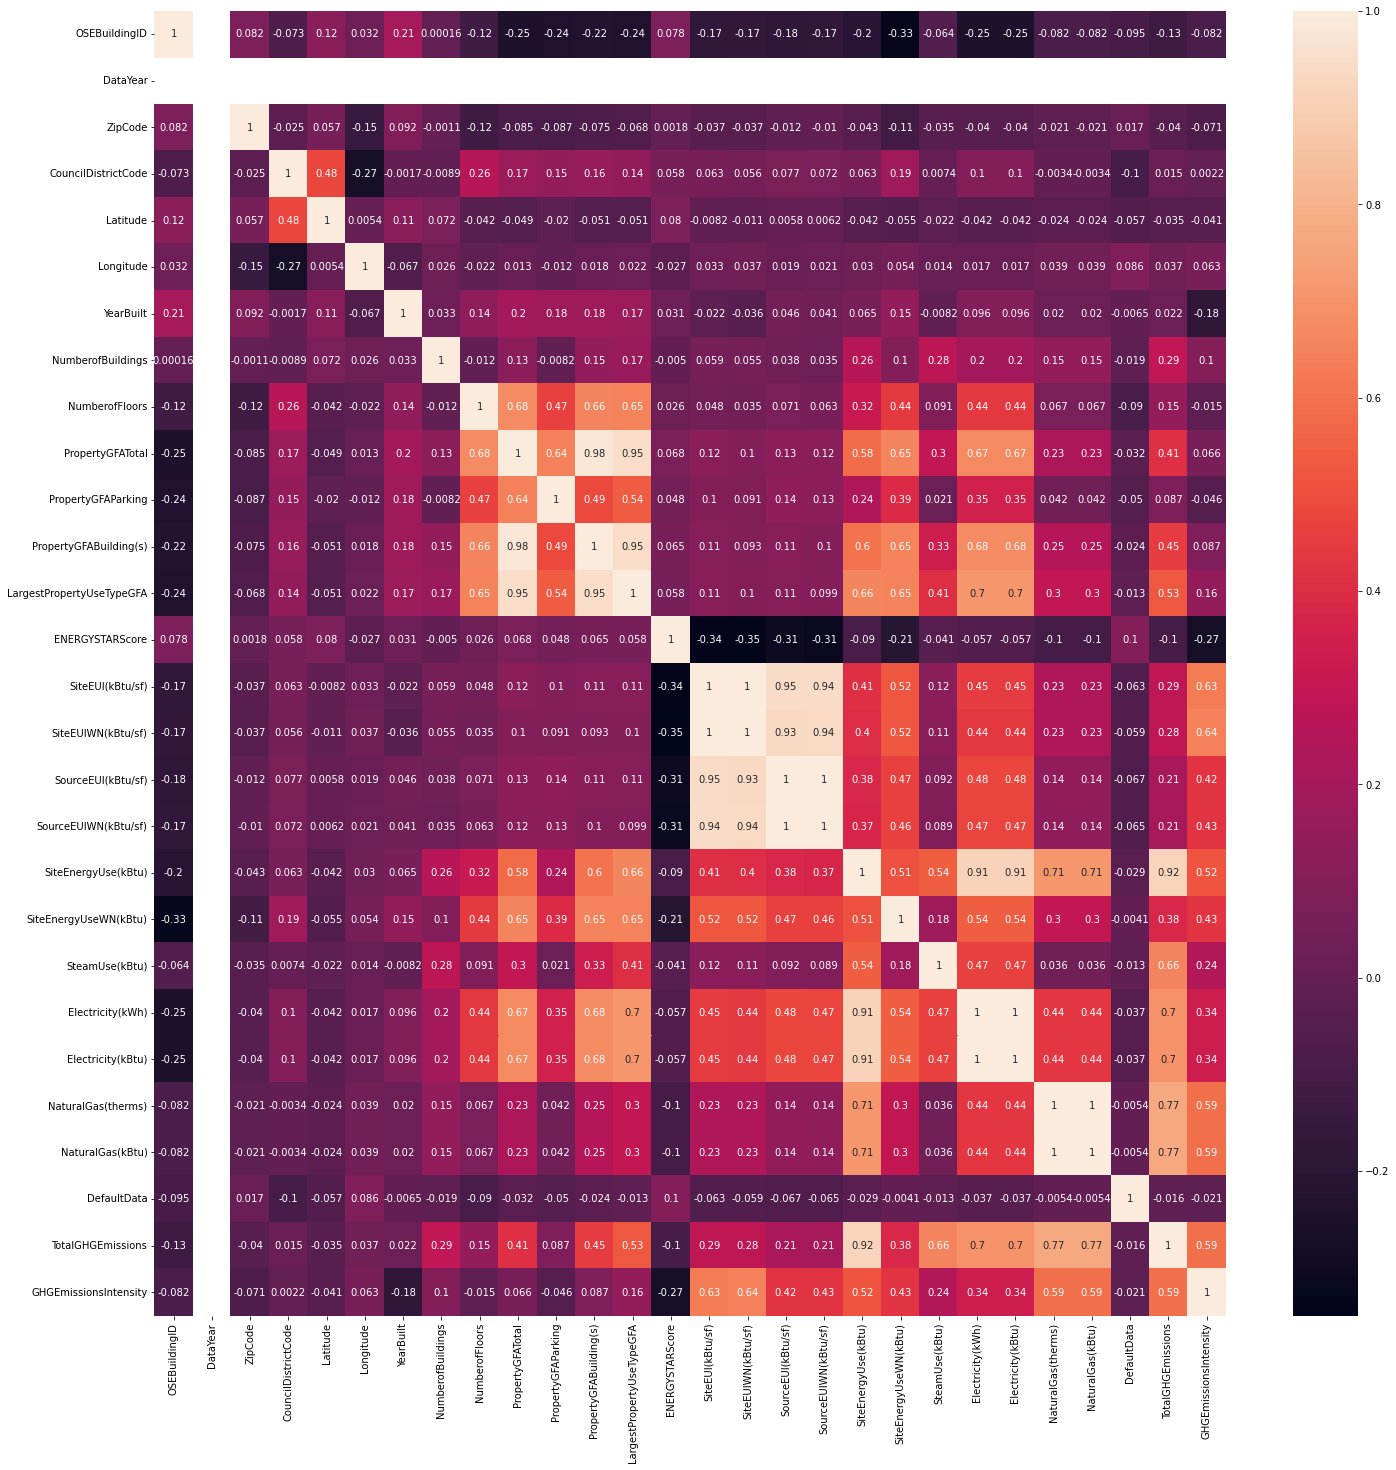

In [7]:
# correlation matrix
fig, ax = plt.subplots(figsize=(24, 24))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
X = X.drop(columns=['PropertyGFATotal', 'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'GHGEmissionsIntensity'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),Electricity(kBtu),NaturalGas(kBtu),BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,81.699997,84.300003,182.500000,189.000000,2.761569,3946027.0,1276453.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,94.800003,97.900002,176.100006,179.399994,2.771009,3242851.0,5145082.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,96.000000,97.699997,241.899994,244.100006,2.896946,49526664.0,1493800.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,110.800003,113.300003,216.199997,224.000000,2.757081,2768924.0,1811213.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,114.800003,118.699997,211.399994,215.600006,2.803384,5368607.0,8803998.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Removing the variables from the consumption bill for our predictions

There are certain variables that we don't want to work with because they depend on existing buildings.
We want to make our predictions for future buildings. 

In [9]:
X = X.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'])
X.head()

,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,BuildingType_Campus,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertType_Distribution Center,PrimaryPropertType_High-Rise Multifamily,PrimaryPropertType_Hospital,PrimaryPropertType_Hotel,PrimaryPropertType_K-12 School,PrimaryPropertType_Large Office,PrimaryPropertType_Low-Rise Multifamily,PrimaryPropertType_Medical Office,PrimaryPropertType_Mid-Rise Multifamily,PrimaryPropertType_Mixed Use Property,PrimaryPropertType_Other,PrimaryPropertType_Refrigerated Warehouse,PrimaryPropertType_Residence Hall,PrimaryPropertType_Retail Store,PrimaryPropertType_Senior Care Community,PrimaryPropertType_Small- and Mid-Sized Office,PrimaryPropertType_Supermarket / Grocery Store,PrimaryPropertType_Warehouse,PrimaryPropertType_Worship Facility,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST
0,0,88434,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15064,88502,61.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,196718,759392,43.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,61320,56.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,62000,113580,75.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Notes about Cross Validation

To start creating ML models, we gotta do cross-validation of our data which means dividing our dataset into a training set and a testing set.
To do so, usually, we divide our data into a certain number of blocks, for instance:

- Ten Fold Blocks Cross Validation (10 blocks)
- Four Fold Blocks Cross Validation (4 blocks)

Then we can use our different models (logistic regression, KNN, SVM...) on our training set, compare them and see which one is the most fittable to our data.

- The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

- Kernel is the mathematical function used to define the hyperparameter and it can be: linear, polynomial, rbf for instance.

Generally cross validation is used for two purposes:

- Defining the best hyperparameters for the model

- Test the model on different data points

# Features Importance

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

MDI = Mean Decrease in Impurity 

In [10]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.sort(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance and get the top 10
    fi_df10 = fi_df.nlargest(10, 'feature_importance')[:10]
    fi_df10.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df10['feature_importance'], y=fi_df10['feature_names'])
    
    
    #Add chart labels
    plt.title(model_type +  ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES') 

# Naive Baseline Creation

Using the mean strategy, we create a baseline to compare our ML models


In [11]:
# adding a dummy baseline to our cross-validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
y_predict_dummy = dummy.predict(X_test)

# dummy statistical metrics

dummy_test_mse = mean_squared_error(y_test, y_predict_dummy)
dummy_test_mae = mean_absolute_error(y_test, y_predict_dummy)
dummy_test_r2 = r2_score(y_test, y_predict_dummy)
dummy_test_rmse = sqrt(mean_squared_error(y_test, y_predict_dummy))

# cross-validation

cv_dummy = cross_val_score(dummy, X_test, y_predict_dummy, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')

# Linear Regression (Ridge)

In [12]:
from sklearn.linear_model import Ridge

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# call the model
ridge = Ridge(random_state = 20)

# hyperparameters
ridge_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_ridge = GridSearchCV(ridge, param_grid = ridge_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_ridge.fit(X_train, y_train)

#Predict the response for test and train datasets
y_ridge_test_pred = g_ridge.predict(X_test)
y_ridge_train_pred = g_ridge.predict(X_train)

# mean error square
ridge_test_mae = mean_absolute_error(y_test, y_ridge_test_pred)
ridge_train_mae = mean_absolute_error(y_train, y_ridge_train_pred)

# best hyperparameter
g_ridge_param = g_ridge.best_params_

# The mean squared error
ridge_test_mse = mean_squared_error(y_test, y_ridge_test_pred)
ridge_train_mse = mean_squared_error(y_train, y_ridge_train_pred)

# The coefficient of determination: 1 is perfect prediction
ridge_test_r2 = r2_score(y_test, y_ridge_test_pred)
ridge_train_r2 = r2_score(y_train, y_ridge_train_pred)

# The root mean squared error
ridge_test_rmse = sqrt(mean_squared_error(y_test, y_ridge_test_pred))
ridge_train_rmse = sqrt(mean_squared_error(y_train, y_ridge_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge:", ridge_time) 

Elapsed time in seconds to run Ridge: 0.6643080000000006


In [13]:
import optuna

def objective(trial):

    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    solver = trial.suggest_categorical("solver",choices=["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"])
    
    
    ## Create Model

    optuna_ridge  = Ridge(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, solver=solver)
   
    ## Fit Model
    
    optuna_ridge.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_ridge.predict(X_test))
    

t1_start = process_time()


study10 = optuna.create_study(study_name="RidgeRegression")
study10.optimize(objective, n_trials=47)

# evaluation metrics

optuna_ridge_rmse = sqrt(study10.best_value)
optuna_ridge_mse = study10.best_value
optuna_ridge_params = study10.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
ridge_time = t1_stop-t1_start

print("Elapsed time in seconds to run Ridge Regression with Optuna tuning hyperparameters:", ridge_time)

print("Best Params : {}".format(optuna_ridge_params))
print("\nBest MSE : {}".format(optuna_ridge_mse))
print("\nBest RMSE : {}".format(optuna_ridge_rmse))


[I 2022-02-01 12:03:37,693] A new study created in memory with name: RidgeRegression
[I 2022-02-01 12:03:37,701] Trial 0 finished with value: 63818.81742576846 and parameters: {'fit_intercept': True, 'n_estimators': 131, 'tol': 0.4615389803184296, 'alpha': 411.6048648604939, 'solver': 'sag'}. Best is trial 0 with value: 63818.81742576846.
[I 2022-02-01 12:03:37,708] Trial 1 finished with value: 58406.89714091664 and parameters: {'fit_intercept': True, 'n_estimators': 42, 'tol': 0.45290879834794073, 'alpha': 828.2514827797922, 'solver': 'sag'}. Best is trial 1 with value: 58406.89714091664.
[I 2022-02-01 12:03:37,717] Trial 2 finished with value: 61552.56187179326 and parameters: {'fit_intercept': True, 'n_estimators': 418, 'tol': 0.05025875997809748, 'alpha': 284.75387609249447, 'solver': 'sag'}. Best is trial 1 with value: 58406.89714091664.
[I 2022-02-01 12:03:37,739] Trial 3 finished with value: 68704.87320147223 and parameters: {'fit_intercept': True, 'n_estimators': 351, 'tol': 0.

[I 2022-02-01 12:03:38,050] Trial 30 finished with value: 50146.43871312463 and parameters: {'fit_intercept': False, 'n_estimators': 139, 'tol': 0.49406544662108554, 'alpha': 637.9566553598584, 'solver': 'lsqr'}. Best is trial 15 with value: 50146.438712296964.
[I 2022-02-01 12:03:38,061] Trial 31 finished with value: 50146.43871252813 and parameters: {'fit_intercept': False, 'n_estimators': 276, 'tol': 0.43591547388173013, 'alpha': 884.1892287654716, 'solver': 'lsqr'}. Best is trial 15 with value: 50146.438712296964.
[I 2022-02-01 12:03:38,073] Trial 32 finished with value: 50146.43871229428 and parameters: {'fit_intercept': False, 'n_estimators': 269, 'tol': 0.43479167208857605, 'alpha': 980.7186025495631, 'solver': 'lsqr'}. Best is trial 32 with value: 50146.43871229428.
[I 2022-02-01 12:03:38,085] Trial 33 finished with value: 50146.43871226129 and parameters: {'fit_intercept': False, 'n_estimators': 71, 'tol': 0.38340599641224127, 'alpha': 994.3470987021445, 'solver': 'lsqr'}. Bes

Elapsed time in seconds to run Ridge Regression with Optuna tuning hyperparameters: 3.0288259999999996
Best Params : {'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}

Best MSE : 42325.02031396865

Best RMSE : 205.73045548476446


In [14]:
# cross validation

cv_ridge_train = cross_val_score(g_ridge, X_train, y_ridge_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_ridge_test = cross_val_score(g_ridge, X_test, y_ridge_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_ridge_results = pd.DataFrame([-cv_ridge_train, -cv_ridge_test, -cv_dummy]).transpose()
cv_ridge_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_ridge_results

,Training Dataset,Test Dataset,Dummy
0,0.018719,0.086206,8.077936e-28
1,0.232614,0.078646,8.077936e-28
2,0.026579,41.476165,8.077936e-28
3,0.013082,0.052201,8.077936e-28
4,0.016281,1.263746,8.077936e-28


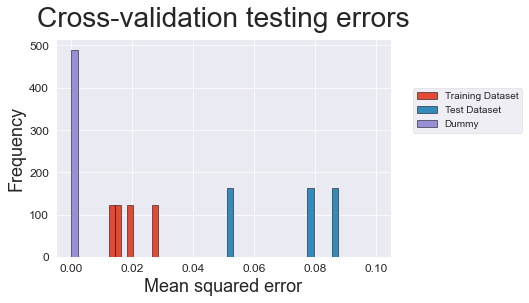

In [15]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.1, num=50)
hist = cv_ridge_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [16]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
ridge_results = pd.DataFrame(['Ridge Regression', ridge_time, g_ridge_param, optuna_ridge_params, ridge_train_mae, ridge_test_mae, dummy_test_mae, ridge_train_mse, ridge_test_mse, optuna_ridge_mse, dummy_test_mse, ridge_train_rmse, ridge_test_rmse, optuna_ridge_rmse, dummy_test_rmse, ridge_train_r2, ridge_test_r2, dummy_test_r2]).transpose()
ridge_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177


# Linear Regression Model (Simple/Least Squares)

More details here: https://realpython.com/linear-regression-in-python/

There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

Simple linear regression is used to estimate the relationship between **two quantitative variables**. 

In [17]:
# We'll start by doing a Linear Regression using one variable to predict our variable TotalGHGEmissions

from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 20)

# start timer
t1_start = process_time()

# call the model
lr = linear_model.LinearRegression()

# train our model
lr.fit(X_train, y_train)

# Predict the response for test and train datasets
y_lr_test_pred = lr.predict(X_test)
y_lr_train_pred = lr.predict(X_train)

# mean error square
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)

# The mean squared error
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)

# The coefficient of determination: 1 is perfect prediction
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

# The root mean squared error
lr_test_rmse = sqrt(mean_squared_error(y_test, y_lr_test_pred))
lr_train_rmse = sqrt(mean_squared_error(y_train, y_lr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Least Squares:", lr_time) 

Elapsed time in seconds to run Least Squares: 0.059630000000000294


In [18]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    

    ## Create Model
    
    optuna_lr  = LinearRegression(fit_intercept=fit_intercept)
    
    ## Fit Model
    
    optuna_lr.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_lr.predict(X_test))
    

t1_start = process_time()


study4 = optuna.create_study(study_name="LinearRegression")
study4.optimize(objective, n_trials=47)

# evaluation metrics

optuna_lr_rmse = sqrt(study4.best_value)
optuna_lr_mse = study4.best_value
optuna_lr_params = study4.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
lr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Linear Regression with Optuna tuning hyperparameters:", lr_time)

print("Best Params : {}".format(optuna_lr_params))
print("\nBest MSE : {}".format(optuna_lr_mse))
print("\nBest RMSE : {}".format(optuna_lr_rmse))


[I 2022-02-01 12:03:39,093] A new study created in memory with name: LinearRegression
[I 2022-02-01 12:03:39,112] Trial 0 finished with value: 127603.14156673804 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 127603.14156673804.
[I 2022-02-01 12:03:39,120] Trial 1 finished with value: 127603.14156675726 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673804.
[I 2022-02-01 12:03:39,125] Trial 2 finished with value: 127603.14156675726 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673804.
[I 2022-02-01 12:03:39,131] Trial 3 finished with value: 127603.14156675726 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673804.
[I 2022-02-01 12:03:39,138] Trial 4 finished with value: 127603.14156675726 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 127603.14156673804.
[I 2022-02-01 12:03:39,144] Trial 5 finished with value: 127603.14156673804 and param

[I 2022-02-01 12:03:39,473] Trial 46 finished with value: 127603.14156673804 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 127603.14156673804.


Elapsed time in seconds to run Linear Regression with Optuna tuning hyperparameters: 2.0368460000000006
Best Params : {'fit_intercept': True}

Best MSE : 127603.14156673804

Best RMSE : 357.21581931199245


In [19]:
# cross validation

cv_lr_train = cross_val_score(lr, X_train, y_lr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lr_test = cross_val_score(lr, X_test, y_lr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lr_results = pd.DataFrame([-cv_lr_train, -cv_lr_test, -cv_dummy]).transpose()
cv_lr_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_lr_results

,Training Dataset,Test Dataset,Dummy
0,2.547558e-24,3.841260e+01,8.077936e-28
1,8.324485e-16,2.904518e-25,8.077936e-28
2,1.861541e-23,9.658154e+01,8.077936e-28
3,5.133464e+01,6.488999e-25,8.077936e-28
4,1.209455e-23,6.209700e-24,8.077936e-28


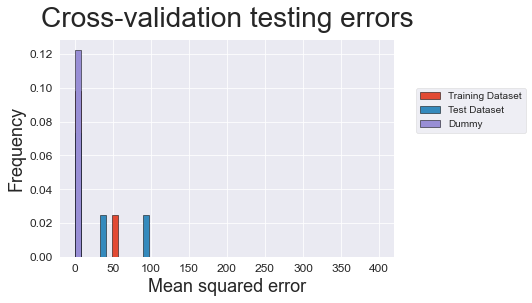

In [20]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400, num=50)
hist = cv_lr_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [21]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
lr_results = pd.DataFrame(['Least Squares Regression', lr_time, optuna_lr_params, lr_train_mae, lr_test_mae, dummy_test_mae, lr_train_mse, lr_test_mse, optuna_lr_mse, dummy_test_mse, lr_train_rmse, lr_test_rmse, optuna_lr_rmse, dummy_test_rmse, lr_train_r2, lr_test_r2, dummy_test_r2]).transpose()
lr_results.columns = ['Method', 'Elapsed Time', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177


# Gradient Boosting

We're going to use two cross-validation methods to define our hyperparameters. To define metrics on our training set we'll use GridSearchCV and for our test set, we'll use **Optuna** library.

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
grad_boosting = GradientBoostingRegressor(validation_fraction=0.2, n_iter_no_change=5, tol=0.01) # creation of early stopping to avoid future overfitting in our model

# define values for hyperparameters
learning_rate = [0.6, 0.75, 0.8]
n_estimators = [20]
max_features = [12]
alpha = [0.85]
max_leaf_nodes = [20]
min_samples_leaf = [4]
min_weight_fraction_leaf = [0.39]
max_depth = [7]
min_impurity_decrease = [0.5]

# Create the random grid
gboosting_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_features': max_features, 'alpha': alpha, 'max_leaf_nodes':max_leaf_nodes, 'min_samples_leaf':min_samples_leaf, 'min_weight_fraction_leaf':min_weight_fraction_leaf, 'max_depth':max_depth, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_boosting = GridSearchCV(grad_boosting, param_grid = gboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
grad_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_grad_boosting_test_pred = grad_boosting.predict(X_test)
y_grad_boosting_train_pred = grad_boosting.predict(X_train)

# fit the grid
g_boosting.fit(X_train, y_train)

# best hyperparameter
g_boosting_param = g_boosting.best_params_

# The mean absolute error
grad_boosting_test_mae = mean_absolute_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mae = mean_absolute_error(y_train, y_grad_boosting_train_pred)

# The mean squared error
grad_boosting_test_mse = mean_squared_error(y_test, y_grad_boosting_test_pred)
grad_boosting_train_mse = mean_squared_error(y_train, y_grad_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
grad_boosting_test_r2 = r2_score(y_test, y_grad_boosting_test_pred)
grad_boosting_train_r2 = r2_score(y_train, y_grad_boosting_train_pred)

# The root mean squared error
grad_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_grad_boosting_test_pred))
grad_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_grad_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor:", grad_boosting_time)

Elapsed time in seconds to run Gradient Boosting Regressor: 0.13609900000000152


In [23]:
import optuna

def objective(trial):
    
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    n_estimators = trial.suggest_int("n_estimators", 1, 100)
    max_features = trial.suggest_int("max_features", 1, 20)
    alpha = trial.suggest_float("alpha", 0, 1)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    validation_fraction= trial.suggest_float("validation_fraction", 0.1, 1)
    n_iter_no_change= trial.suggest_int("n_iter_no_change", 0.1, 25)
    tol= trial.suggest_float("tol", 0.1, 10)
    

    ## Create Model
    
    optuna_grad_boosting  = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, max_features=max_features, alpha=alpha, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, validation_fraction=validation_fraction, n_iter_no_change=n_iter_no_change, tol=tol)
    
    ## Fit Model
    
    optuna_grad_boosting.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_grad_boosting.predict(X_test))
    

t1_start = process_time()


study1 = optuna.create_study(study_name="GradientBoostingRegressor")
study1.optimize(objective, n_trials=47)

# evaluation metrics

optuna_grad_boosting_rmse = sqrt(study1.best_value)
optuna_grad_boosting_mse = study1.best_value
optuna_grad_boosting_params = study1.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
grad_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run Gradient Boosting Regressor with Optuna tuning hyperparameters:", grad_boosting_time)

print("Best Params : {}".format(optuna_grad_boosting_params))
print("\nBest MSE : {}".format(optuna_grad_boosting_mse))
print("\nBest RMSE : {}".format(optuna_grad_boosting_rmse))


[I 2022-02-01 12:03:39,886] A new study created in memory with name: GradientBoostingRegressor
[I 2022-02-01 12:03:39,896] Trial 0 finished with value: 493539.9979465945 and parameters: {'learning_rate': 0.7983069327631462, 'n_estimators': 50, 'max_features': 1, 'alpha': 0.23694503765664776, 'max_leaf_nodes': 13, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.4354701770653878, 'max_depth': 13, 'min_impurity_decrease': 0.7541185434180706, 'validation_fraction': 0.4381917534685794, 'n_iter_no_change': 22, 'tol': 4.966167022639173}. Best is trial 0 with value: 493539.9979465945.
[I 2022-02-01 12:03:39,902] Trial 1 finished with value: 486943.8083745597 and parameters: {'learning_rate': 0.7304676775565311, 'n_estimators': 4, 'max_features': 17, 'alpha': 0.6456374494380793, 'max_leaf_nodes': 24, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.2653119776012124, 'max_depth': 10, 'min_impurity_decrease': 0.11591682140955795, 'validation_fraction': 0.22818397093373785, 'n_iter_no_cha

[I 2022-02-01 12:03:40,222] Trial 16 finished with value: 440444.35930332565 and parameters: {'learning_rate': 0.5670536459657911, 'n_estimators': 74, 'max_features': 16, 'alpha': 0.0010861017448684507, 'max_leaf_nodes': 16, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.16292387404872472, 'max_depth': 9, 'min_impurity_decrease': 0.37848975445833893, 'validation_fraction': 0.586781966475941, 'n_iter_no_change': 10, 'tol': 2.9662306177400324}. Best is trial 14 with value: 389519.19660566596.
[I 2022-02-01 12:03:40,250] Trial 17 finished with value: 455625.69963081356 and parameters: {'learning_rate': 0.2355327309446384, 'n_estimators': 91, 'max_features': 18, 'alpha': 0.1412925944015606, 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.04532264096931313, 'max_depth': 5, 'min_impurity_decrease': 0.35867388360714264, 'validation_fraction': 0.8350270264943112, 'n_iter_no_change': 5, 'tol': 5.889152321562922}. Best is trial 14 with value: 389519.19660566596.

[I 2022-02-01 12:03:40,747] Trial 32 finished with value: 464919.18423203 and parameters: {'learning_rate': 0.0050059198007158245, 'n_estimators': 96, 'max_features': 17, 'alpha': 0.008434732698459443, 'max_leaf_nodes': 14, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.018386320966300714, 'max_depth': 3, 'min_impurity_decrease': 0.05570289924340199, 'validation_fraction': 0.7799803069622899, 'n_iter_no_change': 7, 'tol': 2.13305585562769}. Best is trial 14 with value: 389519.19660566596.
[I 2022-02-01 12:03:40,775] Trial 33 finished with value: 434746.2793204735 and parameters: {'learning_rate': 0.08183182455642324, 'n_estimators': 81, 'max_features': 17, 'alpha': 0.23855407192989808, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.04804162080674147, 'max_depth': 2, 'min_impurity_decrease': 0.11488621666047866, 'validation_fraction': 0.7249497848178981, 'n_iter_no_change': 11, 'tol': 3.470797697346416}. Best is trial 14 with value: 389519.19660566596.

Elapsed time in seconds to run Gradient Boosting Regressor with Optuna tuning hyperparameters: 1.3660510000000023
Best Params : {'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}

Best MSE : 389519.19660566596

Best RMSE : 624.1147303226114


In [24]:
# cross validation

cv_grad_boosting_train = cross_val_score(grad_boosting, X_train, y_grad_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_grad_boosting_test = cross_val_score(grad_boosting, X_test, y_grad_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_grad_boosting_results = pd.DataFrame([-cv_grad_boosting_train, -cv_grad_boosting_test, -cv_dummy]).transpose()
cv_grad_boosting_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_grad_boosting_results

,Training Dataset,Test Dataset,Dummy
0,676366.008552,27836.054113,8.077936e-28
1,358505.188951,3780.399713,8.077936e-28
2,3283.036117,23964.256662,8.077936e-28
3,45563.907033,5290.870261,8.077936e-28
4,330659.675800,16930.897739,8.077936e-28


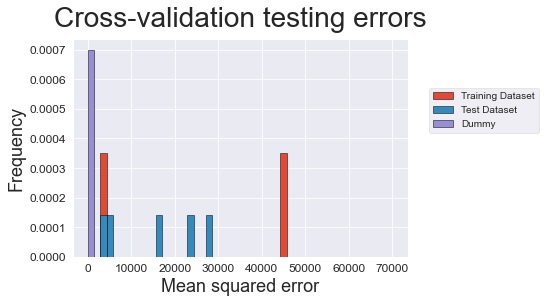

In [25]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=70000, num=50)
hist = cv_grad_boosting_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [26]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
grad_boosting_results = pd.DataFrame(['Gradient Boosting', grad_boosting_time, g_boosting_param, optuna_grad_boosting_params, grad_boosting_train_mae, grad_boosting_test_mae, dummy_test_mae, grad_boosting_train_mse, grad_boosting_test_mse, optuna_grad_boosting_mse, dummy_test_mse, grad_boosting_train_rmse, grad_boosting_test_rmse, optuna_grad_boosting_rmse, dummy_test_rmse, grad_boosting_train_r2, grad_boosting_test_r2, dummy_test_r2]).transpose()
grad_boosting_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,1.366051,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}",78.519498,104.867995,116.981859,34759.932698,365558.443078,389519.196606,38134.369260,186.440158,604.614293,624.114730,195.280233,0.896016,0.258781,-0.060177


# Elastic Net

In [27]:
from sklearn.linear_model import ElasticNet

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
elastic_net = ElasticNet()

# hyperparameters
elasticnet_params = {'alpha':(0, 1, 10, 100, 1000, 10000)}

# cross validation to tune hyperparameter
g_elasticnet = GridSearchCV(elastic_net, param_grid = elasticnet_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_elasticnet.fit(X_train, y_train)

#Predict the response for test and train datasets
y_elastic_test_pred = g_elasticnet.predict(X_test)
y_elastic_train_pred = g_elasticnet.predict(X_train)

# mean error square
elastic_test_mae = mean_absolute_error(y_test, y_elastic_test_pred)
elastic_train_mae = mean_absolute_error(y_train, y_elastic_train_pred)

# best hyperparameter
g_elasticnet_param = g_elasticnet.best_params_

# The mean squared error
elastic_test_mse = mean_squared_error(y_test, y_elastic_test_pred)
elastic_train_mse = mean_squared_error(y_train, y_elastic_train_pred)

# The coefficient of determination: 1 is perfect prediction
elastic_test_r2 = r2_score(y_test, y_elastic_test_pred)
elastic_train_r2 = r2_score(y_train, y_elastic_train_pred)

# The root mean squared error
elastic_test_rmse = sqrt(mean_squared_error(y_test, y_elastic_test_pred))
elastic_train_rmse = sqrt(mean_squared_error(y_train, y_elastic_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net:", elastic_time)

Elapsed time in seconds to run Elastic Net: 2.664429000000002


In [28]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    selection = trial.suggest_categorical("selection",choices=["cyclic","random"])
    l1_ratio = trial.suggest_float("l1_ratio", 0, 1)
    
    

    ## Create Model

    optuna_elastic  = ElasticNet(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, warm_start=warm_start, selection=selection, l1_ratio=l1_ratio)
    
    
    ## Fit Model
    
    optuna_elastic.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_elastic.predict(X_test))
    
t1_start = process_time()


study6 = optuna.create_study(study_name="ElasticNetRegression")
study6.optimize(objective, n_trials=47)

# evaluation metrics

optuna_elastic_rmse = sqrt(study6.best_value)
optuna_elastic_mse = study6.best_value
optuna_elastic_params = study6.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
elastic_time = t1_stop-t1_start

print("Elapsed time in seconds to run Elastic Net Regression with Optuna tuning hyperparameters:", elastic_time)

print("Best Params : {}".format(optuna_elastic_params))
print("\nBest MSE : {}".format(optuna_elastic_mse))
print("\nBest RMSE : {}".format(optuna_elastic_rmse))


[I 2022-02-01 12:03:42,083] A new study created in memory with name: ElasticNetRegression
[I 2022-02-01 12:03:42,093] Trial 0 finished with value: 107262.30948084567 and parameters: {'fit_intercept': False, 'n_estimators': 986, 'tol': 0.03043797071763432, 'alpha': 691.2018928788441, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.7464052741106766}. Best is trial 0 with value: 107262.30948084567.
[I 2022-02-01 12:03:42,099] Trial 1 finished with value: 108287.11075173663 and parameters: {'fit_intercept': False, 'n_estimators': 863, 'tol': 0.17696673962057397, 'alpha': 265.61079798460605, 'warm_start': True, 'selection': 'cyclic', 'l1_ratio': 0.1786387639150272}. Best is trial 0 with value: 107262.30948084567.
[I 2022-02-01 12:03:42,104] Trial 2 finished with value: 97394.78746030724 and parameters: {'fit_intercept': True, 'n_estimators': 950, 'tol': 0.4366010625969201, 'alpha': 800.4834230420452, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.8103466994829467}. Best

[I 2022-02-01 12:03:42,378] Trial 25 finished with value: 79043.16019868902 and parameters: {'fit_intercept': False, 'n_estimators': 569, 'tol': 0.39937862358965215, 'alpha': 990.2481451629678, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9349050709482125}. Best is trial 24 with value: 79022.04829236606.
[I 2022-02-01 12:03:42,391] Trial 26 finished with value: 79054.90780523959 and parameters: {'fit_intercept': False, 'n_estimators': 559, 'tol': 0.39874511212327035, 'alpha': 965.3400500630763, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9680363557499064}. Best is trial 24 with value: 79022.04829236606.
[I 2022-02-01 12:03:42,405] Trial 27 finished with value: 89484.5911322551 and parameters: {'fit_intercept': False, 'n_estimators': 777, 'tol': 0.3436439068536054, 'alpha': 39.14685883346351, 'warm_start': False, 'selection': 'random', 'l1_ratio': 0.9158021745987515}. Best is trial 24 with value: 79022.04829236606.
[I 2022-02-01 12:03:42,420] Trial 28 finished

Elapsed time in seconds to run Elastic Net Regression with Optuna tuning hyperparameters: 3.503230000000002
Best Params : {'fit_intercept': False, 'n_estimators': 569, 'tol': 0.49967345726516027, 'alpha': 998.0244680374492, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9861489399181529}

Best MSE : 79022.04829236606

Best RMSE : 281.1086058667825


In [29]:
# cross validation

cv_elasticnet_train = cross_val_score(g_elasticnet, X_train, y_elastic_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_elasticnet_test = cross_val_score(g_elasticnet, X_test, y_elastic_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_elasticnet_results = pd.DataFrame([-cv_elasticnet_train, -cv_elasticnet_test, -cv_dummy]).transpose()
cv_elasticnet_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_elasticnet_results

,Training Dataset,Test Dataset,Dummy
0,2.152071e-06,1.757289e-08,8.077936e-28
1,6.455553e-07,6.446518e-07,8.077936e-28
2,5.823554e-08,4.098323e-07,8.077936e-28
3,4.352173e-08,2.333142e-06,8.077936e-28
4,2.347649e-06,8.536544e-08,8.077936e-28


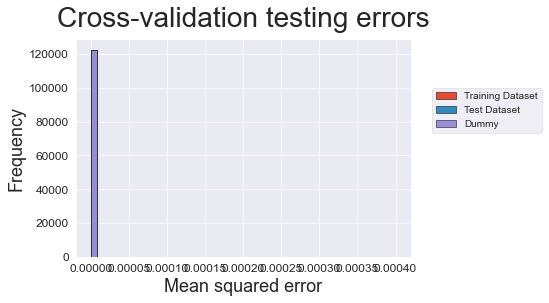

In [30]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.0004, num=50)
hist = cv_elasticnet_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [31]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
elastic_results = pd.DataFrame(['Elastic Net Regression', elastic_time, g_elasticnet_param, optuna_elastic_params, elastic_train_mae, elastic_test_mae, dummy_test_mae, elastic_train_mse, elastic_test_mse, optuna_elastic_mse, dummy_test_mse, elastic_train_rmse, elastic_test_rmse, optuna_elastic_rmse, dummy_test_rmse, elastic_train_r2, elastic_test_r2, dummy_test_r2]).transpose()
elastic_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,1.366051,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}",78.519498,104.867995,116.981859,34759.932698,365558.443078,389519.196606,38134.369260,186.440158,604.614293,624.114730,195.280233,0.896016,0.258781,-0.060177
3,Elastic Net Regression,3.503230,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 569, 'tol': 0.49967345726516027, 'alpha': 998.0244680374492, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9861489399181529}",167.956841,141.057650,116.981859,371160.075674,106128.656085,79022.048292,38134.369260,609.229083,325.773934,281.108606,195.280233,0.299669,-1.950492,-0.060177


# Linear Regression (Lasso)

In [32]:
from sklearn.linear_model import Lasso

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 20)

# start timer
t1_start = process_time()

# call the model
lasso = Lasso()

# hyperparameters
lasso_params = {'alpha':(0.1, 1, 10, 100)}

# cross validation to tune hyperparameter
g_lasso = GridSearchCV(lasso, param_grid = lasso_params, cv=KFold(n_splits=5,shuffle=True))

# perform the search
g_lasso.fit(X_train, y_train)

#Predict the response for test and train datasets
y_lasso_test_pred = g_lasso.predict(X_test)
y_lasso_train_pred = g_lasso.predict(X_train)

# mean error square
lasso_test_mae = mean_absolute_error(y_test, y_lasso_test_pred)
lasso_train_mae = mean_absolute_error(y_train, y_lasso_train_pred)

# best hyperparameter
g_lasso_param = g_lasso.best_params_

# The mean squared error
lasso_test_mse = mean_squared_error(y_test, y_lasso_test_pred)
lasso_train_mse = mean_squared_error(y_train, y_lasso_train_pred)

# The coefficient of determination: 1 is perfect prediction
lasso_test_r2 = r2_score(y_test, y_lasso_test_pred)
lasso_train_r2 = r2_score(y_train, y_lasso_train_pred)

# The root mean squared error
lasso_test_rmse = sqrt(mean_squared_error(y_test, y_lasso_test_pred))
lasso_train_rmse = sqrt(mean_squared_error(y_train, y_lasso_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso:", lasso_time) 

Elapsed time in seconds to run Lasso: 1.542155000000001


In [33]:
import optuna

def objective(trial):
    
    fit_intercept = trial.suggest_categorical("fit_intercept",choices=[True, False])
    max_iter = trial.suggest_int("n_estimators", 1, 1000)
    tol = trial.suggest_float("tol", 0, 0.5)
    alpha = trial.suggest_float("alpha", 0, 1000)
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    selection = trial.suggest_categorical("selection",choices=["cyclic","random"])
    
    

    ## Create Model
    
    optuna_lasso  = Lasso(fit_intercept=fit_intercept, max_iter=max_iter, tol=tol, alpha=alpha, warm_start=warm_start, selection=selection)
    
    ## Fit Model
    
    optuna_lasso.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_lasso.predict(X_test))
    
t1_start = process_time()


study5 = optuna.create_study(study_name="LassoRegression")
study5.optimize(objective, n_trials=47)

# evaluation metrics

optuna_lasso_rmse = sqrt(study5.best_value)
optuna_lasso_mse = study5.best_value
optuna_lasso_params = study5.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
lasso_time = t1_stop-t1_start

print("Elapsed time in seconds to run Lasso Regression with Optuna tuning hyperparameters:", lasso_time)

print("Best Params : {}".format(optuna_lasso_params))
print("\nBest MSE : {}".format(optuna_lasso_mse))
print("\nBest RMSE : {}".format(optuna_lasso_rmse))


[I 2022-02-01 12:03:44,306] A new study created in memory with name: LassoRegression
[I 2022-02-01 12:03:44,312] Trial 0 finished with value: 85041.67480780544 and parameters: {'fit_intercept': False, 'n_estimators': 517, 'tol': 0.3531999148506563, 'alpha': 432.65032982246964, 'warm_start': True, 'selection': 'random'}. Best is trial 0 with value: 85041.67480780544.
[I 2022-02-01 12:03:44,318] Trial 1 finished with value: 105237.43170915247 and parameters: {'fit_intercept': True, 'n_estimators': 91, 'tol': 0.029089457686595155, 'alpha': 483.44601288001854, 'warm_start': True, 'selection': 'random'}. Best is trial 0 with value: 85041.67480780544.
[I 2022-02-01 12:03:44,325] Trial 2 finished with value: 108668.78092404499 and parameters: {'fit_intercept': False, 'n_estimators': 500, 'tol': 0.18507413869519385, 'alpha': 294.9832658454423, 'warm_start': False, 'selection': 'cyclic'}. Best is trial 0 with value: 85041.67480780544.
[I 2022-02-01 12:03:44,331] Trial 3 finished with value: 104

[I 2022-02-01 12:03:44,600] Trial 28 finished with value: 79273.36015995994 and parameters: {'fit_intercept': False, 'n_estimators': 247, 'tol': 0.3683760364717398, 'alpha': 721.3279232481513, 'warm_start': False, 'selection': 'cyclic'}. Best is trial 28 with value: 79273.36015995994.
[I 2022-02-01 12:03:44,612] Trial 29 finished with value: 79277.68322085125 and parameters: {'fit_intercept': False, 'n_estimators': 25, 'tol': 0.35797031260979534, 'alpha': 716.9618848999717, 'warm_start': True, 'selection': 'cyclic'}. Best is trial 28 with value: 79273.36015995994.
[I 2022-02-01 12:03:44,624] Trial 30 finished with value: 106972.51998213759 and parameters: {'fit_intercept': False, 'n_estimators': 9, 'tol': 0.30075486205856816, 'alpha': 881.2253428824991, 'warm_start': True, 'selection': 'cyclic'}. Best is trial 28 with value: 79273.36015995994.
[I 2022-02-01 12:03:44,636] Trial 31 finished with value: 79266.13355353406 and parameters: {'fit_intercept': False, 'n_estimators': 87, 'tol': 

Elapsed time in seconds to run Lasso Regression with Optuna tuning hyperparameters: 3.0942039999999977
Best Params : {'fit_intercept': False, 'n_estimators': 67, 'tol': 0.36704206611664186, 'alpha': 756.5015812057887, 'warm_start': True, 'selection': 'cyclic'}

Best MSE : 79238.86642683404

Best RMSE : 281.49399003679287


In [34]:
# cross validation

cv_lasso_train = cross_val_score(g_lasso, X_train, y_lasso_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lasso_test = cross_val_score(g_lasso, X_test, y_lasso_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_lasso_results = pd.DataFrame([-cv_lasso_train, -cv_lasso_test, -cv_dummy]).transpose()
cv_lasso_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_lasso_results

,Training Dataset,Test Dataset,Dummy
0,3.317755,3.336169,8.077936e-28
1,3.590307,20.336819,8.077936e-28
2,30.341925,4.205766,8.077936e-28
3,8.939885,6.181725,8.077936e-28
4,9.007094,4.429069,8.077936e-28


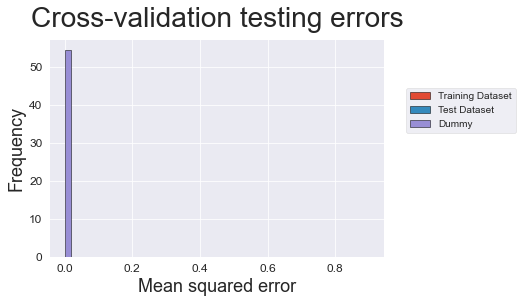

In [35]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.9, num=50)
hist = cv_lasso_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [36]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
lasso_results = pd.DataFrame(['Lasso Regression', lasso_time, g_lasso_param, optuna_lasso_params, lasso_train_mae, lasso_test_mae, dummy_test_mae, lasso_train_mse, lasso_test_mse, optuna_lasso_mse, dummy_test_mse, lasso_train_rmse, lasso_test_rmse, optuna_lasso_rmse, dummy_test_rmse, lasso_train_r2, lasso_test_r2, dummy_test_r2]).transpose()
lasso_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,1.366051,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}",78.519498,104.867995,116.981859,34759.932698,365558.443078,389519.196606,38134.369260,186.440158,604.614293,624.114730,195.280233,0.896016,0.258781,-0.060177
3,Elastic Net Regression,3.503230,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 569, 'tol': 0.49967345726516027, 'alpha': 998.0244680374492, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9861489399181529}",167.956841,141.057650,116.981859,371160.075674,106128.656085,79022.048292,38134.369260,609.229083,325.773934,281.108606,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,3.094204,{'alpha': 1},"{'fit_intercept': False, 'n_estimators': 67, 'tol': 0.36704206611664186, 'alpha': 756.5015812057887, 'warm_start': True, 'selection': 'cyclic'}",191.471066,166.415506,116.981859,351370.233496,117303.664817,79238.866427,38134.369260,592.764906,342.496226,281.493990,195.280233,0.337010,-2.261170,-0.060177


# Decision Trees

In [37]:
from sklearn.tree import DecisionTreeRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# Call the model 
tree = DecisionTreeRegressor()

# define values for hyperparameters
max_features = [20]
max_depth = [7]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [5]
min_impurity_decrease = [0.685]

# Create the random grid
tree_grid = {'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes': max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_tree = GridSearchCV(tree, param_grid = tree_grid, cv=KFold(n_splits=5,shuffle=True))

# Performing training
tree.fit(X_train, y_train)

#Predict the response for test and train datasets
y_tree_test_pred = tree.predict(X_test)
y_tree_train_pred = tree.predict(X_train)

# mean error square
tree_test_mae = mean_absolute_error(y_test, y_tree_test_pred)
tree_train_mae = mean_absolute_error(y_train, y_tree_train_pred)

# fit the grid
g_tree.fit(X_train, y_train)

# best hyperparameter
g_tree_param = g_tree.best_params_

# The mean squared error
tree_test_mse = mean_squared_error(y_test, y_tree_test_pred)
tree_train_mse = mean_squared_error(y_train, y_tree_train_pred)


# The coefficient of determination: 1 is perfect prediction
tree_test_r2 = r2_score(y_test, y_tree_test_pred)
tree_train_r2 = r2_score(y_train, y_tree_train_pred)

# The root mean squared error
tree_test_rmse = sqrt(mean_squared_error(y_test, y_tree_test_pred))
tree_train_rmse = sqrt(mean_squared_error(y_train, y_tree_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
tree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Trees:", tree_time)

Elapsed time in seconds to run Decision Trees: 0.04212700000000069


In [38]:
import optuna

def objective(trial):
    
    
    max_features = trial.suggest_int("max_features", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    splitter= trial.suggest_categorical("splitter",choices=["best", "random"]) 
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) 
    

    ## Create Model
    
    optuna_tree  = DecisionTreeRegressor(max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, min_samples_split=min_samples_split, splitter=splitter)
    
    ## Fit Model
    
    optuna_tree.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_tree.predict(X_test))
    

t1_start = process_time()


study7 = optuna.create_study(study_name="DecisionTreeRegressor")
study7.optimize(objective, n_trials=47)

# evaluation metrics

optuna_tree_rmse = sqrt(study7.best_value)
optuna_tree_mse = study7.best_value
optuna_tree_params = study7.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
rtree_time = t1_stop-t1_start

print("Elapsed time in seconds to run Decision Tree Regressor with Optuna tuning hyperparameters:", tree_time)

print("Best Params : {}".format(optuna_tree_params))
print("\nBest MSE : {}".format(optuna_tree_mse))
print("\nBest RMSE : {}".format(optuna_tree_rmse))


[I 2022-02-01 12:03:45,852] A new study created in memory with name: DecisionTreeRegressor
[I 2022-02-01 12:03:45,858] Trial 0 finished with value: 38134.36925986053 and parameters: {'max_features': 9, 'max_leaf_nodes': 23, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.29531903208189453, 'max_depth': 14, 'min_impurity_decrease': 0.10064377857062068, 'splitter': 'best', 'min_samples_split': 9}. Best is trial 0 with value: 38134.36925986053.
[I 2022-02-01 12:03:45,863] Trial 1 finished with value: 38134.36925986053 and parameters: {'max_features': 6, 'max_leaf_nodes': 8, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.46317024396683915, 'max_depth': 12, 'min_impurity_decrease': 0.5681818309945744, 'splitter': 'best', 'min_samples_split': 11}. Best is trial 0 with value: 38134.36925986053.
[I 2022-02-01 12:03:45,868] Trial 2 finished with value: 42166.69544471265 and parameters: {'max_features': 16, 'max_leaf_nodes': 22, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.234

[I 2022-02-01 12:03:46,140] Trial 22 finished with value: 40442.9008651021 and parameters: {'max_features': 8, 'max_leaf_nodes': 17, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.3094126080031076, 'max_depth': 4, 'min_impurity_decrease': 0.031481429347059386, 'splitter': 'best', 'min_samples_split': 10}. Best is trial 11 with value: 37832.627216204324.
[I 2022-02-01 12:03:46,158] Trial 23 finished with value: 40579.818446292404 and parameters: {'max_features': 1, 'max_leaf_nodes': 11, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.20447382866418776, 'max_depth': 9, 'min_impurity_decrease': 0.2647938230514316, 'splitter': 'best', 'min_samples_split': 20}. Best is trial 11 with value: 37832.627216204324.
[I 2022-02-01 12:03:46,176] Trial 24 finished with value: 38134.36925986053 and parameters: {'max_features': 5, 'max_leaf_nodes': 12, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.12453584862037731, 'max_depth': 9, 'min_impurity_decrease': 0.46451620444352737, 'splitt

[I 2022-02-01 12:03:46,528] Trial 44 finished with value: 55891.479176161585 and parameters: {'max_features': 4, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.09429239680386249, 'max_depth': 3, 'min_impurity_decrease': 0.5151390272317224, 'splitter': 'best', 'min_samples_split': 15}. Best is trial 42 with value: 37094.52887862132.
[I 2022-02-01 12:03:46,545] Trial 45 finished with value: 39136.66004932279 and parameters: {'max_features': 6, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.22304612959004796, 'max_depth': 6, 'min_impurity_decrease': 0.5968777881699738, 'splitter': 'best', 'min_samples_split': 18}. Best is trial 42 with value: 37094.52887862132.
[I 2022-02-01 12:03:46,563] Trial 46 finished with value: 37933.22250749819 and parameters: {'max_features': 20, 'max_leaf_nodes': 6, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.4985368948821767, 'max_depth': 7, 'min_impurity_decrease': 0.6165845965199191, 'splitter': '

Elapsed time in seconds to run Decision Tree Regressor with Optuna tuning hyperparameters: 0.04212700000000069
Best Params : {'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.10387502487294888, 'max_depth': 5, 'min_impurity_decrease': 0.621614616467458, 'splitter': 'best', 'min_samples_split': 18}

Best MSE : 37094.52887862132

Best RMSE : 192.59939999548627


In [39]:
# cross validation

cv_tree_train = cross_val_score(g_tree, X_train, y_tree_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_tree_test = cross_val_score(g_tree, X_test, y_tree_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_tree_results = pd.DataFrame([-cv_tree_train, -cv_tree_test, -cv_dummy]).transpose()
cv_tree_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_tree_results

,Training Dataset,Test Dataset,Dummy
0,2.012187e+05,2.352332e+05,8.077936e-28
1,1.934067e+05,1.350278e+04,8.077936e-28
2,1.417935e+06,3.655426e+04,8.077936e-28
3,7.550499e+05,3.874281e+05,8.077936e-28
4,5.436864e+05,1.261365e+06,8.077936e-28


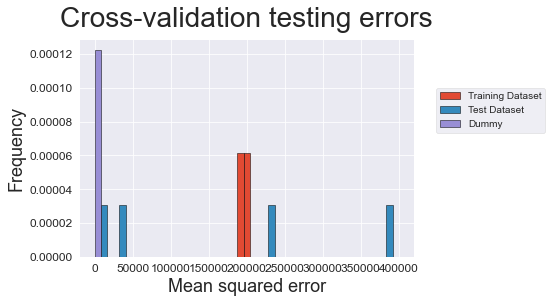

In [40]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400000, num=50)
hist = cv_tree_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [41]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
tree_results = pd.DataFrame(['Decision Trees Regressor', tree_time, g_tree_param, optuna_tree_params, tree_train_mae, tree_test_mae, dummy_test_mae, tree_train_mse, tree_test_mse, optuna_tree_mse, dummy_test_mse, tree_train_rmse, tree_test_rmse, optuna_tree_rmse, dummy_test_rmse, tree_train_r2, tree_test_r2, dummy_test_r2]).transpose()
tree_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,1.366051,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}",78.519498,104.867995,116.981859,34759.932698,365558.443078,389519.196606,38134.369260,186.440158,604.614293,624.114730,195.280233,0.896016,0.258781,-0.060177
3,Elastic Net Regression,3.503230,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 569, 'tol': 0.49967345726516027, 'alpha': 998.0244680374492, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9861489399181529}",167.956841,141.057650,116.981859,371160.075674,106128.656085,79022.048292,38134.369260,609.229083,325.773934,281.108606,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,3.094204,{'alpha': 1},"{'fit_intercept': False, 'n_estimators': 67, 'tol': 0.36704206611664186, 'alpha': 756.5015812057887, 'warm_start': True, 'selection': 'cyclic'}",191.471066,166.415506,116.981859,351370.233496,117303.664817,79238.866427,38134.369260,592.764906,342.496226,281.493990,195.280233,0.337010,-2.261170,-0.060177
5,Decision Trees Regressor,0.042127,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.10387502487294888, 'max_depth': 5, 'min_impurity_decrease': 0.621614616467458, 'splitter': 'best', 'min_samples_split': 18}",0.000000,97.142096,116.981859,0.000000,248947.817052,37094.528879,38134.369260,0.000000,498.946708,192.599400,195.280233,1.000000,-5.921021,-0.060177


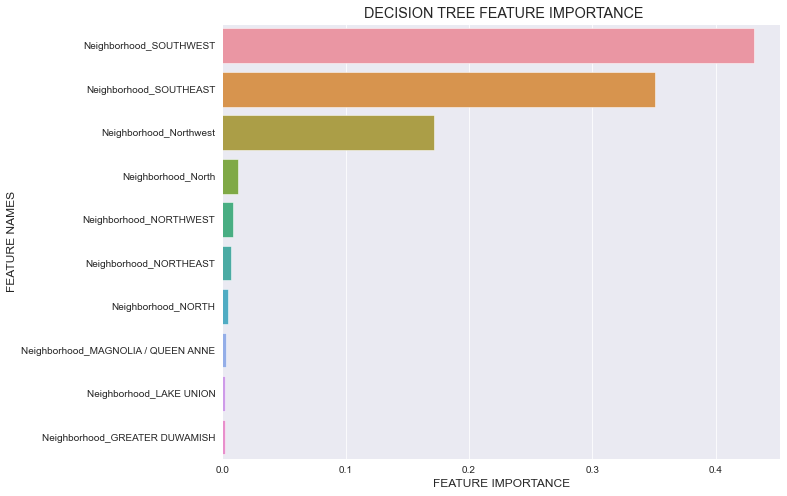

In [42]:
plot_feature_importance(tree.feature_importances_,X.columns,' DECISION TREE')

# Random Forests

In [43]:
# revoir les hyperparamètres de la random forest afin de réduire le temps de run

from sklearn.ensemble import RandomForestRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# create the model
rf = RandomForestRegressor() 

# define values for hyperparameters
n_estimators = [250]
max_features = [10]
max_depth = [8]
min_samples_split = [4]
min_samples_leaf = [3]
max_leaf_nodes = [7]
min_impurity_decrease = [0.65]

# Create the random grid
rf_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_leaf_nodes':max_leaf_nodes, 'min_impurity_decrease':min_impurity_decrease}

# cross validation to tune hyperparameter
g_rf = GridSearchCV(rf, param_grid = rf_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model 
rf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_rf_test_pred = rf.predict(X_test)
y_rf_train_pred = rf.predict(X_train)

# fit the grid
g_rf.fit(X_train, y_train)

# best hyperparameter
g_rf_param = g_rf.best_params_

# The mean absolute error
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)

# The mean squared error
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)

# The coefficient of determination: 1 is perfect prediction
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

# The root mean squared error
rf_test_rmse = sqrt(mean_squared_error(y_test, y_rf_test_pred))
rf_train_rmse = sqrt(mean_squared_error(y_train, y_rf_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forest:", rf_time)

Elapsed time in seconds to run Random Forest: 1.6458219999999955


In [44]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 100)
    max_features = trial.suggest_int("max_features", 1, 20)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 25)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0, 0.5)
    max_depth = trial.suggest_int("max_depth", 1, 15)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0, 1)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) 
    max_samples = trial.suggest_int("max_samples", 1, 100)
    bootstrap = trial.suggest_categorical("bootstrap",choices=[True, False]) 
    

    ## Create Model
    
    optuna_rf  = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_depth=max_depth, min_impurity_decrease=min_impurity_decrease, min_samples_split=min_samples_split, max_samples=max_samples, bootstrap=bootstrap)
    
    ## Fit Model
    
    optuna_rf.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_rf.predict(X_test))
    

t1_start = process_time()


study2 = optuna.create_study(study_name="RandomForestsRegressor")
study2.optimize(objective, n_trials=47)

# evaluation metrics

optuna_rf_rmse = sqrt(study2.best_value)
optuna_rf_mse = study2.best_value
optuna_rf_params = study2.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
rf_time = t1_stop-t1_start

print("Elapsed time in seconds to run Random Forests Regressor with Optuna tuning hyperparameters:", rf_time)

print("Best Params : {}".format(optuna_rf_params))
print("\nBest MSE : {}".format(optuna_rf_mse))
print("\nBest RMSE : {}".format(optuna_rf_rmse))


[I 2022-02-01 12:03:48,698] A new study created in memory with name: RandomForestsRegressor
[I 2022-02-01 12:03:48,730] Trial 0 finished with value: 36886.6684496891 and parameters: {'n_estimators': 40, 'max_features': 1, 'max_leaf_nodes': 20, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.07275173752561326, 'max_depth': 7, 'min_impurity_decrease': 0.7203250857379705, 'min_samples_split': 13, 'max_samples': 67, 'bootstrap': True}. Best is trial 0 with value: 36886.6684496891.
[I 2022-02-01 12:03:48,768] Trial 1 finished with value: 36727.92119722351 and parameters: {'n_estimators': 78, 'max_features': 2, 'max_leaf_nodes': 11, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.3196266207766679, 'max_depth': 8, 'min_impurity_decrease': 0.89189939719561, 'min_samples_split': 14, 'max_samples': 57, 'bootstrap': False}. Best is trial 1 with value: 36727.92119722351.
[I 2022-02-01 12:03:48,801] Trial 2 finished with value: 37620.489889823744 and parameters: {'n_estimators': 66, 'max_

[I 2022-02-01 12:03:49,691] Trial 20 finished with value: 30088.4201554499 and parameters: {'n_estimators': 31, 'max_features': 11, 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.09568545014842314, 'max_depth': 3, 'min_impurity_decrease': 0.9780353296713332, 'min_samples_split': 5, 'max_samples': 96, 'bootstrap': True}. Best is trial 12 with value: 28633.53511043309.
[I 2022-02-01 12:03:49,744] Trial 21 finished with value: 27908.01649013368 and parameters: {'n_estimators': 52, 'max_features': 15, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.14284818104150596, 'max_depth': 3, 'min_impurity_decrease': 0.8542817667550113, 'min_samples_split': 2, 'max_samples': 41, 'bootstrap': True}. Best is trial 21 with value: 27908.01649013368.
[I 2022-02-01 12:03:49,794] Trial 22 finished with value: 28151.87540806052 and parameters: {'n_estimators': 49, 'max_features': 15, 'max_leaf_nodes': 5, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 

[I 2022-02-01 12:03:50,641] Trial 40 finished with value: 29712.241575297783 and parameters: {'n_estimators': 9, 'max_features': 14, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.1829138421128521, 'max_depth': 4, 'min_impurity_decrease': 0.5641544522281193, 'min_samples_split': 12, 'max_samples': 24, 'bootstrap': True}. Best is trial 24 with value: 27479.121053511233.
[I 2022-02-01 12:03:50,690] Trial 41 finished with value: 31510.118371022796 and parameters: {'n_estimators': 49, 'max_features': 15, 'max_leaf_nodes': 4, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.15210345303620365, 'max_depth': 4, 'min_impurity_decrease': 0.8764951212439515, 'min_samples_split': 4, 'max_samples': 43, 'bootstrap': True}. Best is trial 24 with value: 27479.121053511233.
[I 2022-02-01 12:03:50,737] Trial 42 finished with value: 32231.7812937016 and parameters: {'n_estimators': 43, 'max_features': 16, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_weight_fraction_le

Elapsed time in seconds to run Random Forests Regressor with Optuna tuning hyperparameters: 2.2556790000000007
Best Params : {'n_estimators': 49, 'max_features': 16, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.06340038833309806, 'max_depth': 6, 'min_impurity_decrease': 0.8818018101967287, 'min_samples_split': 10, 'max_samples': 43, 'bootstrap': True}

Best MSE : 27479.121053511233

Best RMSE : 165.76827517203415


In [45]:
# cross validation

cv_rf_train = cross_val_score(g_rf, X_train, y_rf_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_rf_test = cross_val_score(g_rf, X_test, y_rf_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_rf_results = pd.DataFrame([-cv_rf_train, -cv_rf_test, -cv_dummy]).transpose()
cv_rf_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_rf_results

,Training Dataset,Test Dataset,Dummy
0,148736.985656,12165.508645,8.077936e-28
1,144180.442159,54653.978249,8.077936e-28
2,18628.461182,64189.448919,8.077936e-28
3,607953.837149,5051.235479,8.077936e-28
4,45358.261067,250779.624979,8.077936e-28


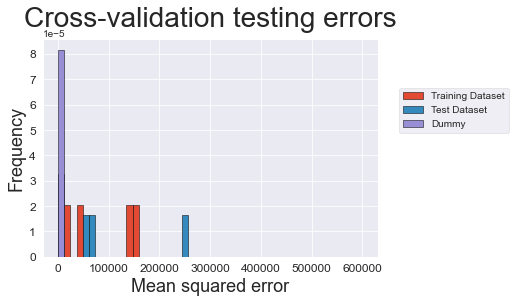

In [46]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=600000, num=50)
hist = cv_rf_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [47]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
rf_results = pd.DataFrame(['Random Forest', rf_time, g_rf_param, optuna_rf_params, rf_train_mae, rf_test_mae, dummy_test_mae, rf_train_mse, rf_test_mse, optuna_rf_mse, dummy_test_mse, rf_train_rmse, rf_test_rmse, optuna_rf_rmse, dummy_test_rmse, rf_train_r2, rf_test_r2, dummy_test_r2]).transpose()
rf_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,1.366051,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}",78.519498,104.867995,116.981859,34759.932698,365558.443078,389519.196606,38134.369260,186.440158,604.614293,624.114730,195.280233,0.896016,0.258781,-0.060177
3,Elastic Net Regression,3.503230,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 569, 'tol': 0.49967345726516027, 'alpha': 998.0244680374492, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9861489399181529}",167.956841,141.057650,116.981859,371160.075674,106128.656085,79022.048292,38134.369260,609.229083,325.773934,281.108606,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,3.094204,{'alpha': 1},"{'fit_intercept': False, 'n_estimators': 67, 'tol': 0.36704206611664186, 'alpha': 756.5015812057887, 'warm_start': True, 'selection': 'cyclic'}",191.471066,166.415506,116.981859,351370.233496,117303.664817,79238.866427,38134.369260,592.764906,342.496226,281.493990,195.280233,0.337010,-2.261170,-0.060177
5,Decision Trees Regressor,0.042127,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.10387502487294888, 'max_depth': 5, 'min_impurity_decrease': 0.621614616467458, 'splitter': 'best', 'min_samples_split': 18}",0.000000,97.142096,116.981859,0.000000,248947.817052,37094.528879,38134.369260,0.000000,498.946708,192.599400,195.280233,1.000000,-5.921021,-0.060177
6,Random Forest,2.255679,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 49, 'max_features': 16, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.06340038833309806, 'max_depth': 6, 'min_impurity_decrease': 0.8818018101967287, 'min_samples_split': 10, 'max_samples': 43, 'bootstrap': True}",46.079375,88.450373,116.981859,65711.188813,100126.627770,27479.121054,38134.369260,256.341937,316.427919,165.768275,195.280233,0.876012,-1.783630,-0.060177


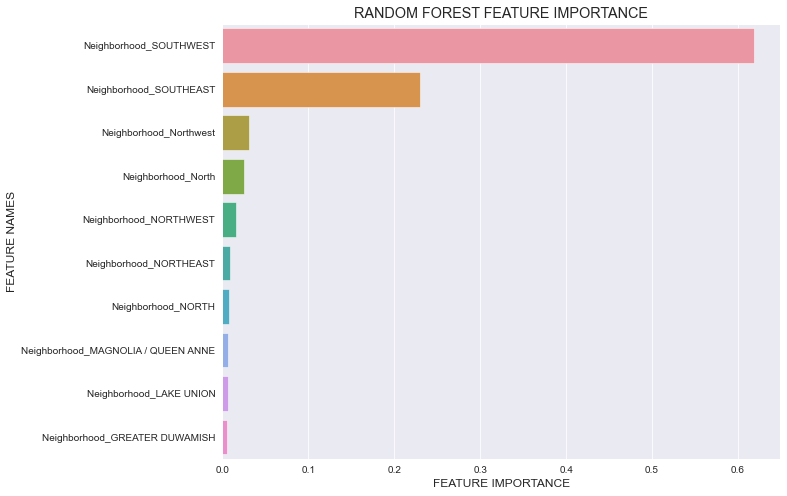

In [48]:
# features importance for random forest
plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST')
plt.savefig('rffeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Support Vector Regression

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.



In [49]:
from sklearn.svm import SVR

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

#call the model
svr = SVR()

# define values for hyperparameters
kernel = ['poly']
degree = [1] # linear
C = [200]

# Create the random grid
svr_grid = {'kernel': kernel, 'degree': degree, 'C': C}

# cross validation to tune hyperparameter
gsvr = GridSearchCV(svr, param_grid = svr_grid, cv=KFold(n_splits=5,shuffle=True))

# train our models with the parameters we indicated
gsvr.fit(X_train, y_train)

#Predict the response for test dataset
y_svr_test_pred = gsvr.predict(X_test)
y_svr_train_pred = gsvr.predict(X_train)

# mean error square
svr_test_mae = mean_absolute_error(y_test, y_svr_test_pred)
svr_train_mae = mean_absolute_error(y_train, y_svr_train_pred)

# best hyperparameter
gsvr_param = gsvr.best_params_

# The mean squared error
svr_test_mse = mean_squared_error(y_test, y_svr_test_pred)
svr_train_mse = mean_squared_error(y_train, y_svr_train_pred)

# The coefficient of determination: 1 is perfect prediction
svr_test_r2 = r2_score(y_test, y_svr_test_pred)
svr_train_r2 = r2_score(y_train, y_svr_train_pred)

# The root mean squared error
svr_test_rmse = sqrt(mean_squared_error(y_test, y_svr_test_pred))
svr_train_rmse = sqrt(mean_squared_error(y_train, y_svr_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run SVR:", svr_time) 

Elapsed time in seconds to run SVR: 0.5902400000000014


In [50]:
import optuna

def objective(trial):

    gamma = trial.suggest_categorical("gamma", choices=["auto", "scale"])
    verbose = trial.suggest_categorical("verbose", choices=[True, False])
    C = trial.suggest_float("C", 1, 100)
    epsilon = trial.suggest_float("epsilon", 0, 1)
    shrinking = trial.suggest_categorical("shrinking",choices=[True,False]) 

    ## Create Model
    
    optuna_svr = SVR(epsilon=epsilon, gamma=gamma, C=C, shrinking=shrinking, verbose=verbose)
    
    ## Fit Model
    
    optuna_svr.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_svr.predict(X_test))
    

t1_start = process_time()


study9 = optuna.create_study(study_name="SupportVectorRegressor")
study9.optimize(objective, n_trials=47)

# evaluation metrics

optuna_svr_rmse = sqrt(study9.best_value)
optuna_svr_mse = study9.best_value
optuna_svr_params = study9.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
svr_time = t1_stop-t1_start

print("Elapsed time in seconds to run Support Vector Regressor with Optuna tuning hyperparameters:", svr_time)

print("Best Params : {}".format(optuna_svr_params))
print("\nBest MSE : {}".format(optuna_svr_mse))
print("\nBest RMSE : {}".format(optuna_svr_rmse))


[I 2022-02-01 12:04:02,293] A new study created in memory with name: SupportVectorRegressor
[I 2022-02-01 12:04:02,529] Trial 0 finished with value: 27024.214484047036 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 49.1538838461756, 'epsilon': 0.5837190710241775, 'shrinking': False}. Best is trial 0 with value: 27024.214484047036.
[I 2022-02-01 12:04:02,743] Trial 1 finished with value: 38058.29994216714 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 51.60705411129309, 'epsilon': 0.6672798663443701, 'shrinking': True}. Best is trial 0 with value: 27024.214484047036.
[I 2022-02-01 12:04:02,959] Trial 2 finished with value: 38387.05255883514 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 40.922171657424315, 'epsilon': 0.7586676643468208, 'shrinking': False}. Best is trial 0 with value: 27024.214484047036.


[LibSVM]

[I 2022-02-01 12:04:03,192] Trial 3 finished with value: 28262.455266277735 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 12.259493090173981, 'epsilon': 0.9251218491462133, 'shrinking': True}. Best is trial 0 with value: 27024.214484047036.


[LibSVM]

[I 2022-02-01 12:04:03,417] Trial 4 finished with value: 37935.4051020715 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 57.09088988022759, 'epsilon': 0.18621267952707854, 'shrinking': False}. Best is trial 0 with value: 27024.214484047036.
[I 2022-02-01 12:04:03,651] Trial 5 finished with value: 27242.075338073275 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 35.64270281761768, 'epsilon': 0.5030277031706372, 'shrinking': True}. Best is trial 0 with value: 27024.214484047036.
[I 2022-02-01 12:04:03,858] Trial 6 finished with value: 37343.99460727878 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 85.71473371888003, 'epsilon': 0.9492794507961834, 'shrinking': True}. Best is trial 0 with value: 27024.214484047036.


[LibSVM]

[I 2022-02-01 12:04:04,070] Trial 7 finished with value: 37643.133168431 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 70.13243565927114, 'epsilon': 0.23906397364725718, 'shrinking': True}. Best is trial 0 with value: 27024.214484047036.


[LibSVM]

[I 2022-02-01 12:04:04,293] Trial 8 finished with value: 38036.34145378523 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 53.20697532880313, 'epsilon': 0.16850502361913677, 'shrinking': False}. Best is trial 0 with value: 27024.214484047036.


[LibSVM]

[I 2022-02-01 12:04:04,549] Trial 9 finished with value: 26597.509636218758 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 85.38623443204182, 'epsilon': 0.3113373693628949, 'shrinking': True}. Best is trial 9 with value: 26597.509636218758.


[LibSVM]

[I 2022-02-01 12:04:04,807] Trial 10 finished with value: 26515.10432453641 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 97.80613892615489, 'epsilon': 0.38261219561229065, 'shrinking': True}. Best is trial 10 with value: 26515.10432453641.


[LibSVM]

[I 2022-02-01 12:04:05,046] Trial 11 finished with value: 26525.164333609297 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 94.62257060412429, 'epsilon': 0.3564782881567742, 'shrinking': True}. Best is trial 10 with value: 26515.10432453641.


[LibSVM]

[I 2022-02-01 12:04:05,284] Trial 12 finished with value: 26511.32176618737 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 99.65203352054853, 'epsilon': 0.39856934064261207, 'shrinking': True}. Best is trial 12 with value: 26511.32176618737.


[LibSVM]

[I 2022-02-01 12:04:05,522] Trial 13 finished with value: 26516.380025035603 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 98.00014990078253, 'epsilon': 0.4057760716894937, 'shrinking': True}. Best is trial 12 with value: 26511.32176618737.


[LibSVM]

[I 2022-02-01 12:04:05,781] Trial 14 finished with value: 26637.703691746072 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 80.08530491701825, 'epsilon': 0.08559672476169561, 'shrinking': True}. Best is trial 12 with value: 26511.32176618737.


[LibSVM]

[I 2022-02-01 12:04:06,022] Trial 15 finished with value: 26746.59228530782 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 72.26990493175182, 'epsilon': 0.44355629669484137, 'shrinking': True}. Best is trial 12 with value: 26511.32176618737.


[LibSVM]

[I 2022-02-01 12:04:06,262] Trial 16 finished with value: 26510.529096199876 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 98.56430391064634, 'epsilon': 0.03239358738075865, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:06,499] Trial 17 finished with value: 32643.648957340374 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 1.308599527976007, 'epsilon': 0.014255865540099555, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:06,759] Trial 18 finished with value: 26856.28946065436 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 65.49728321510077, 'epsilon': 0.012737555355067612, 'shrinking': False}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:06,995] Trial 19 finished with value: 27423.7475821243 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 26.541845875420695, 'epsilon': 0.8127462115753001, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:07,246] Trial 20 finished with value: 26591.806594955106 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 86.98166390630345, 'epsilon': 0.5417840239255844, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:07,486] Trial 21 finished with value: 26521.215673212286 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 99.30773150365528, 'epsilon': 0.6359962693823266, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:07,726] Trial 22 finished with value: 26537.76616093821 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 91.32350054227899, 'epsilon': 0.28269793651224173, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:07,985] Trial 23 finished with value: 26638.324297031086 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 80.03397411911449, 'epsilon': 0.13086059417064835, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:08,224] Trial 24 finished with value: 26513.71403478184 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 99.09197485093638, 'epsilon': 0.4150337997691672, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:08,464] Trial 25 finished with value: 26692.529665289698 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 76.6473792081612, 'epsilon': 0.45106680529262044, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:08,723] Trial 26 finished with value: 26551.309530660674 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 90.08286866040896, 'epsilon': 0.26181976697660736, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.
[I 2022-02-01 12:04:08,966] Trial 27 finished with value: 26857.423556750062 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 65.90228710378979, 'epsilon': 0.7564526070131937, 'shrinking': False}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:09,204] Trial 28 finished with value: 26535.532358113578 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 92.11948232909046, 'epsilon': 0.32911480453927067, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.
[I 2022-02-01 12:04:09,456] Trial 29 finished with value: 26892.301264727543 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 61.70012181442736, 'epsilon': 0.5181679864522785, 'shrinking': False}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:09,702] Trial 30 finished with value: 26647.763248595096 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 81.69980971070376, 'epsilon': 0.6309112485426092, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:09,941] Trial 31 finished with value: 26512.29579996163 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 99.51182885958292, 'epsilon': 0.4074501219121975, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:10,181] Trial 32 finished with value: 26519.61343951355 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 99.75807011321922, 'epsilon': 0.56787788415568, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:10,440] Trial 33 finished with value: 26542.995072618254 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 91.88971596964426, 'epsilon': 0.42834639025796656, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.
[I 2022-02-01 12:04:10,665] Trial 34 finished with value: 37548.46539331501 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 75.11117921178592, 'epsilon': 0.22319258036188747, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:10,904] Trial 35 finished with value: 26586.813788580854 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 87.69021896711833, 'epsilon': 0.6958522711951194, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:11,127] Trial 36 finished with value: 38346.286708034735 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 42.51042567880549, 'epsilon': 0.46948228706947465, 'shrinking': False}. Best is trial 16 with value: 26510.529096199876.
[I 2022-02-01 12:04:11,368] Trial 37 finished with value: 26527.598621803856 and parameters: {'gamma': 'scale', 'verbose': False, 'C': 93.68581593453158, 'epsilon': 0.10086728295979269, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:11,607] Trial 38 finished with value: 26643.440125442914 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 83.21701133956634, 'epsilon': 0.9967427931701369, 'shrinking': True}. Best is trial 16 with value: 26510.529096199876.
[I 2022-02-01 12:04:11,825] Trial 39 finished with value: 39115.90917249903 and parameters: {'gamma': 'auto', 'verbose': False, 'C': 16.99668748977478, 'epsilon': 0.8492364741450968, 'shrinking': False}. Best is trial 16 with value: 26510.529096199876.


[LibSVM]

[I 2022-02-01 12:04:12,066] Trial 40 finished with value: 26507.17491740979 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 98.41251813361635, 'epsilon': 0.19467222966775766, 'shrinking': True}. Best is trial 40 with value: 26507.17491740979.


[LibSVM]

[I 2022-02-01 12:04:12,306] Trial 41 finished with value: 26526.853238780965 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 94.77798190584734, 'epsilon': 0.1644733743815937, 'shrinking': True}. Best is trial 40 with value: 26507.17491740979.


[LibSVM]

[I 2022-02-01 12:04:12,546] Trial 42 finished with value: 26505.11194227752 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 99.3051783017924, 'epsilon': 0.2072652721107602, 'shrinking': True}. Best is trial 42 with value: 26505.11194227752.


[LibSVM]

[I 2022-02-01 12:04:12,791] Trial 43 finished with value: 26561.769842760863 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 87.8916761822346, 'epsilon': 0.06696268557762036, 'shrinking': True}. Best is trial 42 with value: 26505.11194227752.


[LibSVM]

[I 2022-02-01 12:04:13,031] Trial 44 finished with value: 26518.191280151856 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 95.62327283044212, 'epsilon': 0.20446839535337227, 'shrinking': True}. Best is trial 42 with value: 26505.11194227752.


[LibSVM]

[I 2022-02-01 12:04:13,249] Trial 45 finished with value: 37164.4007095628 and parameters: {'gamma': 'auto', 'verbose': True, 'C': 99.8372192411892, 'epsilon': 0.35722525702593455, 'shrinking': True}. Best is trial 42 with value: 26505.11194227752.


[LibSVM]

[I 2022-02-01 12:04:13,488] Trial 46 finished with value: 26564.3865041942 and parameters: {'gamma': 'scale', 'verbose': True, 'C': 89.06070125470656, 'epsilon': 0.2943549568236669, 'shrinking': True}. Best is trial 42 with value: 26505.11194227752.


Elapsed time in seconds to run Support Vector Regressor with Optuna tuning hyperparameters: 11.224056999999995
Best Params : {'gamma': 'scale', 'verbose': True, 'C': 99.3051783017924, 'epsilon': 0.2072652721107602, 'shrinking': True}

Best MSE : 26505.11194227752

Best RMSE : 162.80390640975884


In [51]:
# cross validation

cv_svr_train = cross_val_score(gsvr, X_train, y_svr_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_svr_test = cross_val_score(gsvr, X_test, y_svr_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_svr_results = pd.DataFrame([-cv_svr_train, -cv_svr_test, -cv_dummy]).transpose()
cv_svr_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_svr_results

,Training Dataset,Test Dataset,Dummy
0,0.008473,0.007867,8.077936e-28
1,0.008269,0.008131,8.077936e-28
2,0.008301,0.008074,8.077936e-28
3,0.008227,0.007957,8.077936e-28
4,0.008387,0.008096,8.077936e-28


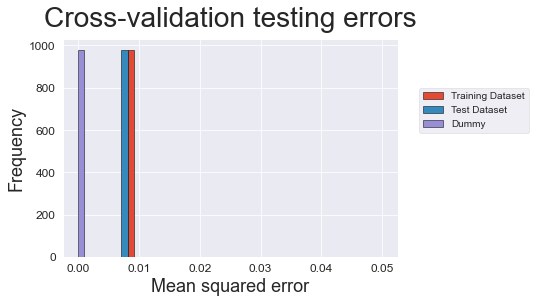

In [52]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=0.05, num=50)
hist = cv_svr_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [53]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
svr_results = pd.DataFrame(['SVR', svr_time, gsvr_param, optuna_svr_params, svr_train_mae, svr_test_mae, dummy_test_mae, svr_train_mse, svr_test_mse, optuna_svr_mse, dummy_test_mse, svr_train_rmse, svr_test_rmse, optuna_svr_rmse, dummy_test_rmse,  svr_train_r2, svr_test_r2, dummy_test_r2]).transpose()
svr_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,1.366051,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}",78.519498,104.867995,116.981859,34759.932698,365558.443078,389519.196606,38134.369260,186.440158,604.614293,624.114730,195.280233,0.896016,0.258781,-0.060177
3,Elastic Net Regression,3.503230,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 569, 'tol': 0.49967345726516027, 'alpha': 998.0244680374492, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9861489399181529}",167.956841,141.057650,116.981859,371160.075674,106128.656085,79022.048292,38134.369260,609.229083,325.773934,281.108606,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,3.094204,{'alpha': 1},"{'fit_intercept': False, 'n_estimators': 67, 'tol': 0.36704206611664186, 'alpha': 756.5015812057887, 'warm_start': True, 'selection': 'cyclic'}",191.471066,166.415506,116.981859,351370.233496,117303.664817,79238.866427,38134.369260,592.764906,342.496226,281.493990,195.280233,0.337010,-2.261170,-0.060177
5,Decision Trees Regressor,0.042127,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.10387502487294888, 'max_depth': 5, 'min_impurity_decrease': 0.621614616467458, 'splitter': 'best', 'min_samples_split': 18}",0.000000,97.142096,116.981859,0.000000,248947.817052,37094.528879,38134.369260,0.000000,498.946708,192.599400,195.280233,1.000000,-5.921021,-0.060177
6,Random Forest,2.255679,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 49, 'max_features': 16, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.06340038833309806, 'max_depth': 6, 'min_impurity_decrease': 0.8818018101967287, 'min_samples_split': 10, 'max_samples': 43, 'bootstrap': True}",46.079375,88.450373,116.981859,65711.188813,100126.627770,27479.121054,38134.369260,256.341937,316.427919,165.768275,195.280233,0.876012,-1.783630,-0.060177
7,SVR,11.224057,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': True, 'C': 99.3051783017924, 'epsilon': 0.2072652721107602, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26505.111942,38134.369260,682.798367,166.397473,162.803906,195.280233,0.120315,0.230240,-0.060177


# Bagging for Regression

In [54]:
from sklearn.ensemble import BaggingRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a RF classifier
reg_bagging = BaggingRegressor() 

# define values for hyperparameters
n_estimators = [200]
max_features = [30]
max_samples = [100]

# Create the random grid
rbag_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_samples':max_samples}

# cross validation to tune hyperparameter
g_rbag = GridSearchCV(reg_bagging, param_grid = rbag_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
reg_bagging.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_reg_bagging_test_pred = reg_bagging.predict(X_test)
y_reg_bagging_train_pred = reg_bagging.predict(X_train)

# fit the grid
g_rbag.fit(X_train, y_train)

# best hyperparameter
g_rbag_param = g_rbag.best_params_

# The mean absolute error
reg_bagging_test_mae = mean_absolute_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mae = mean_absolute_error(y_train, y_reg_bagging_train_pred)

# The mean squared error
reg_bagging_test_mse = mean_squared_error(y_test, y_reg_bagging_test_pred)
reg_bagging_train_mse = mean_squared_error(y_train, y_reg_bagging_train_pred)

# The coefficient of determination: 1 is perfect prediction
reg_bagging_test_r2 = r2_score(y_test, y_reg_bagging_test_pred)
reg_bagging_train_r2 = r2_score(y_train, y_reg_bagging_train_pred)

# The root mean squared error
reg_bagging_test_rmse = sqrt(mean_squared_error(y_test, y_reg_bagging_test_pred))
reg_bagging_train_rmse = sqrt(mean_squared_error(y_train, y_reg_bagging_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
rbagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor:", rbagging_time)

Elapsed time in seconds to run Bagging Regressor: 1.2433180000000021


In [55]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int("n_estimators", 1, 200)
    max_features = trial.suggest_int("max_features", 1, 30)
    max_samples = trial.suggest_int("max_samples", 1, 100)
    bootstrap = trial.suggest_categorical("bootstrap",choices=[True, False])
    bootstrap_features = trial.suggest_categorical("bootstrap_features",choices=[True, False])
    warm_start = trial.suggest_categorical("warm_start",choices=[True, False])
    

    ## Create Model
    
    optuna_bagging  = BaggingRegressor(n_estimators=n_estimators, max_features=max_features, max_samples=max_samples, bootstrap=bootstrap, bootstrap_features=bootstrap_features, warm_start=warm_start)
    
    ## Fit Model
    
    optuna_bagging.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_bagging.predict(X_test))
    

t1_start = process_time()


study3 = optuna.create_study(study_name="BaggingRegressor")
study3.optimize(objective, n_trials=47)

# evaluation metrics

optuna_bagging_rmse = sqrt(study3.best_value)
optuna_bagging_mse = study3.best_value
optuna_bagging_params = study3.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
bagging_time = t1_stop-t1_start

print("Elapsed time in seconds to run Bagging Regressor with Optuna tuning hyperparameters:", bagging_time)

print("Best Params : {}".format(optuna_bagging_params))
print("\nBest MSE : {}".format(optuna_bagging_mse))
print("\nBest RMSE : {}".format(optuna_bagging_rmse))


[I 2022-02-01 12:04:15,468] A new study created in memory with name: BaggingRegressor
[I 2022-02-01 12:04:15,568] Trial 0 finished with value: 41793.70581338492 and parameters: {'n_estimators': 106, 'max_features': 17, 'max_samples': 91, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': False}. Best is trial 0 with value: 41793.70581338492.
[I 2022-02-01 12:04:15,613] Trial 1 finished with value: 34836.12536447259 and parameters: {'n_estimators': 49, 'max_features': 28, 'max_samples': 13, 'bootstrap': False, 'bootstrap_features': True, 'warm_start': True}. Best is trial 1 with value: 34836.12536447259.
[I 2022-02-01 12:04:15,765] Trial 2 finished with value: 31324.601412283624 and parameters: {'n_estimators': 197, 'max_features': 13, 'max_samples': 11, 'bootstrap': False, 'bootstrap_features': True, 'warm_start': True}. Best is trial 2 with value: 31324.601412283624.
[I 2022-02-01 12:04:15,777] Trial 3 finished with value: 34857.12974608258 and parameters: {'n_estimators':

[I 2022-02-01 12:04:17,849] Trial 29 finished with value: 28780.56666320418 and parameters: {'n_estimators': 91, 'max_features': 20, 'max_samples': 30, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': False}. Best is trial 25 with value: 27036.01815347049.
[I 2022-02-01 12:04:17,941] Trial 30 finished with value: 30577.806630840205 and parameters: {'n_estimators': 109, 'max_features': 25, 'max_samples': 7, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': False}. Best is trial 25 with value: 27036.01815347049.
[I 2022-02-01 12:04:18,011] Trial 31 finished with value: 26156.479441212196 and parameters: {'n_estimators': 73, 'max_features': 29, 'max_samples': 20, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': False}. Best is trial 31 with value: 26156.479441212196.
[I 2022-02-01 12:04:18,067] Trial 32 finished with value: 32244.019385205924 and parameters: {'n_estimators': 57, 'max_features': 29, 'max_samples': 17, 'bootstrap': False, 'bootstrap_

Elapsed time in seconds to run Bagging Regressor with Optuna tuning hyperparameters: 3.5134010000000018
Best Params : {'n_estimators': 73, 'max_features': 29, 'max_samples': 20, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': False}

Best MSE : 26156.479441212196

Best RMSE : 161.72964923356568


In [56]:
# cross validation

cv_bagging_train = cross_val_score(g_rbag, X_train, y_reg_bagging_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_bagging_test = cross_val_score(g_rbag, X_test, y_reg_bagging_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_bagging_results = pd.DataFrame([-cv_bagging_train, -cv_bagging_test, -cv_dummy]).transpose()
cv_bagging_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_bagging_results

,Training Dataset,Test Dataset,Dummy
0,658295.097047,6045.339271,8.077936e-28
1,26935.618534,35944.624940,8.077936e-28
2,147115.440928,12948.067247,8.077936e-28
3,204576.503763,124417.766822,8.077936e-28
4,22842.475729,92385.052573,8.077936e-28


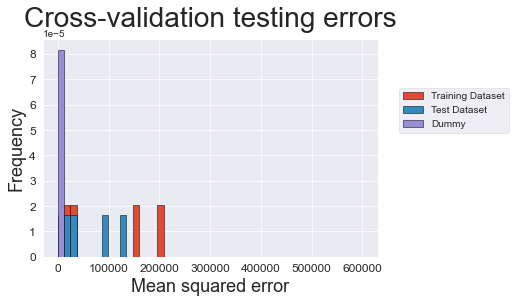

In [57]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=600000, num=50)
hist = cv_bagging_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [58]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
bagging_results = pd.DataFrame(['Bagging Regressor', rbagging_time, g_rbag_param, optuna_bagging_params, reg_bagging_train_mae, reg_bagging_test_mae, dummy_test_mae, reg_bagging_train_mse, reg_bagging_test_mse, optuna_bagging_mse, dummy_test_mse, reg_bagging_train_rmse, reg_bagging_test_rmse, optuna_bagging_rmse, dummy_test_rmse, reg_bagging_train_r2, reg_bagging_test_r2, dummy_test_r2]).transpose()
bagging_results.columns = ['Method', 'Elapsed Time', 'GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results, bagging_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,1.366051,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}",78.519498,104.867995,116.981859,34759.932698,365558.443078,389519.196606,38134.369260,186.440158,604.614293,624.114730,195.280233,0.896016,0.258781,-0.060177
3,Elastic Net Regression,3.503230,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 569, 'tol': 0.49967345726516027, 'alpha': 998.0244680374492, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9861489399181529}",167.956841,141.057650,116.981859,371160.075674,106128.656085,79022.048292,38134.369260,609.229083,325.773934,281.108606,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,3.094204,{'alpha': 1},"{'fit_intercept': False, 'n_estimators': 67, 'tol': 0.36704206611664186, 'alpha': 756.5015812057887, 'warm_start': True, 'selection': 'cyclic'}",191.471066,166.415506,116.981859,351370.233496,117303.664817,79238.866427,38134.369260,592.764906,342.496226,281.493990,195.280233,0.337010,-2.261170,-0.060177
5,Decision Trees Regressor,0.042127,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.10387502487294888, 'max_depth': 5, 'min_impurity_decrease': 0.621614616467458, 'splitter': 'best', 'min_samples_split': 18}",0.000000,97.142096,116.981859,0.000000,248947.817052,37094.528879,38134.369260,0.000000,498.946708,192.599400,195.280233,1.000000,-5.921021,-0.060177
6,Random Forest,2.255679,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 49, 'max_features': 16, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.06340038833309806, 'max_depth': 6, 'min_impurity_decrease': 0.8818018101967287, 'min_samples_split': 10, 'max_samples': 43, 'bootstrap': True}",46.079375,88.450373,116.981859,65711.188813,100126.627770,27479.121054,38134.369260,256.341937,316.427919,165.768275,195.280233,0.876012,-1.783630,-0.060177
7,SVR,11.224057,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': True, 'C': 99.3051783017924, 'epsilon': 0.2072652721107602, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26505.111942,38134.369260,682.798367,166.397473,162.803906,195.280233,0.120315,0.230240,-0.060177
8,Bagging Regressor,1.243318,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}","{'n_estimators': 73, 'max_features': 29, 'max_samples': 20, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': False}",42.721434,81.382238,116.98185

# XGBoost

In [59]:
import xgboost as xgb
import xgboost as XGBRegressor

# split our dataset for prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

# start timer
t1_start = process_time()

# creating a gradient boost classifier
xg_boosting = xgb.XGBRegressor() 

# define values for hyperparameters
eta = [0.2] 
alpha = [0.7]
gamma = [3]
max_depth = [12]
max_leaves = [4]
min_child_weight = [3]

# Create the random grid
xgboosting_grid = {'eta': eta, 'alpha': alpha, 'gamma': gamma, 'max_depth':max_depth, 'max_leaves':max_leaves, 'min_child_weight':min_child_weight}

# cross validation to tune hyperparameter
g_xg_boosting = GridSearchCV(xg_boosting, param_grid = xgboosting_grid, cv=KFold(n_splits=5,shuffle=True))

# train the model using the classifier
xg_boosting.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_xg_boosting_test_pred = xg_boosting.predict(X_test)
y_xg_boosting_train_pred = xg_boosting.predict(X_train)

# fit the grid
g_xg_boosting.fit(X_train, y_train)

# best hyperparameter
g_xgboosting_param = g_xg_boosting.best_params_

# The mean absolute error
xg_boosting_test_mae = mean_absolute_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mae = mean_absolute_error(y_train, y_xg_boosting_train_pred)

# The mean squared error
xg_boosting_test_mse = mean_squared_error(y_test, y_xg_boosting_test_pred)
xg_boosting_train_mse = mean_squared_error(y_train, y_xg_boosting_train_pred)

# The coefficient of determination: 1 is perfect prediction
xg_boosting_test_r2 = r2_score(y_test, y_xg_boosting_test_pred)
xg_boosting_train_r2 = r2_score(y_train, y_xg_boosting_train_pred)

# The root mean squared error
xg_boosting_test_rmse = sqrt(mean_squared_error(y_test, y_xg_boosting_test_pred))
xg_boosting_train_rmse = sqrt(mean_squared_error(y_train, y_xg_boosting_train_pred))

# stop timer
t1_stop = process_time()

# Elapsed time
xg_boosting_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoosting Regressor:", xg_boosting_time)

Elapsed time in seconds to run XGBoosting Regressor: 10.302341999999996


In [60]:
import optuna

def objective(trial):
    
    
    colsample_bylevel = trial.suggest_float("colsample_bylevel", 0, 1)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0, 1)
    booster= trial.suggest_categorical("booster",choices=["gbtree", "gblinear"])
    gamma = trial.suggest_float("gamma", 0, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    max_delta_step = trial.suggest_float("max_delta_step", 0, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 25)
    min_child_weights = trial.suggest_float("min_child_weights", 0, 100)
    n_estimators = trial.suggest_int("n_estimators", 10, 2000)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 1000)
    reg_lambda = trial.suggest_float("reg_lambda", 0, 1000)
    

    ## Create Model
    
    optuna_xgboost  = xgb.XGBRegressor(n_estimators=n_estimators, reg_alpha=reg_alpha, reg_lambda=reg_lambda, colsample_bylevel=colsample_bylevel, colsample_bytree=colsample_bytree, booster=booster, gamma=gamma, max_depth=max_depth, learning_rate=learning_rate, max_delta_step=max_delta_step, min_child_weights=min_child_weights)
    
    ## Fit Model
    
    optuna_xgboost.fit(X_train, y_train)

    return mean_squared_error(y_test, optuna_xgboost.predict(X_test))
    

t1_start = process_time()


study8 = optuna.create_study(study_name="XGBoost")
study8.optimize(objective, n_trials=47)

# evaluation metrics

optuna_xgboost_rmse = sqrt(study8.best_value)
optuna_xgboost_mse = study8.best_value
optuna_xgboost_params = study8.best_params

# stop timer
t1_stop = process_time()

# Elapsed time
xgboost_time = t1_stop-t1_start

print("Elapsed time in seconds to run XGBoost Regressor with Optuna tuning hyperparameters:", xgboost_time)

print("Best Params : {}".format(optuna_xgboost_params))
print("\nBest MSE : {}".format(optuna_xgboost_mse))
print("\nBest RMSE : {}".format(optuna_xgboost_rmse))


[I 2022-02-01 12:04:32,660] A new study created in memory with name: XGBoost
[I 2022-02-01 12:04:32,757] Trial 0 finished with value: 106601.6645165399 and parameters: {'colsample_bylevel': 0.7930461862934933, 'colsample_bytree': 0.8544217560793231, 'booster': 'gblinear', 'gamma': 225.91959046512545, 'learning_rate': 0.4277987262068643, 'max_delta_step': 774.7132649929556, 'max_depth': 1, 'min_child_weights': 70.37008868522811, 'n_estimators': 614, 'reg_alpha': 589.2619819043952, 'reg_lambda': 692.3767195150178}. Best is trial 0 with value: 106601.6645165399.


[12:04:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:04:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an

[I 2022-02-01 12:04:33,192] Trial 1 finished with value: 106289.89397000316 and parameters: {'colsample_bylevel': 0.8561445501252033, 'colsample_bytree': 0.43403084479982257, 'booster': 'gblinear', 'gamma': 94.74710588624392, 'learning_rate': 0.5099462061312601, 'max_delta_step': 954.6809097029275, 'max_depth': 10, 'min_child_weights': 60.43520891169255, 'n_estimators': 1310, 'reg_alpha': 678.7110308775734, 'reg_lambda': 461.6525888528057}. Best is trial 1 with value: 106289.89397000316.


[12:04:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:35,335] Trial 2 finished with value: 44120.11970523305 and parameters: {'colsample_bylevel': 0.6200276354433772, 'colsample_bytree': 0.6691486014068754, 'booster': 'gbtree', 'gamma': 712.5497262717105, 'learning_rate': 0.2317966198042667, 'max_delta_step': 433.2518717225915, 'max_depth': 20, 'min_child_weights': 40.67857399194034, 'n_estimators': 646, 'reg_alpha': 801.0371446687875, 'reg_lambda': 223.24730479815724}. Best is trial 2 with value: 44120.11970523305.
[I 2022-02-01 12:04:35,361] Trial 3 finished with value: 104872.23567433302 and parameters: {'colsample_bylevel': 0.8352328887326951, 'colsample_bytree': 0.3527956382581152, 'booster': 'gblinear', 'gamma': 568.6020907051267, 'learning_rate': 0.1425790328612031, 'max_delta_step': 526.2566284971352, 'max_depth': 4, 'min_child_weights': 50.11233519558598, 'n_estimators': 89, 'reg_alpha': 31.388222918453003, 'reg_lambda': 482.5734368471737}. Best is trial 2 with value: 44120.11970523305.
[I 2022-02-01 12:04:35,

[12:04:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:04:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an

[I 2022-02-01 12:04:35,696] Trial 5 finished with value: 105656.11699965513 and parameters: {'colsample_bylevel': 0.7625901877203425, 'colsample_bytree': 0.2408182991765243, 'booster': 'gblinear', 'gamma': 670.3166593740624, 'learning_rate': 0.9270929646723617, 'max_delta_step': 586.2013490778197, 'max_depth': 9, 'min_child_weights': 63.881103624905556, 'n_estimators': 1916, 'reg_alpha': 292.3293881621065, 'reg_lambda': 375.1914979827442}. Best is trial 2 with value: 44120.11970523305.


[12:04:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:35,914] Trial 6 finished with value: 107049.89119569703 and parameters: {'colsample_bylevel': 0.2478575073526168, 'colsample_bytree': 0.09258950650907061, 'booster': 'gblinear', 'gamma': 856.8941387851431, 'learning_rate': 0.18173997700748334, 'max_delta_step': 772.44018206166, 'max_depth': 13, 'min_child_weights': 75.35583725044191, 'n_estimators': 1375, 'reg_alpha': 617.099820064058, 'reg_lambda': 955.7934619710215}. Best is trial 2 with value: 44120.11970523305.


[12:04:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:36,197] Trial 7 finished with value: 105374.5506007553 and parameters: {'colsample_bylevel': 0.21539058933683186, 'colsample_bytree': 0.05093715515745101, 'booster': 'gblinear', 'gamma': 422.48602737028295, 'learning_rate': 0.4768710435324579, 'max_delta_step': 560.4876784341241, 'max_depth': 14, 'min_child_weights': 48.16516949039291, 'n_estimators': 1779, 'reg_alpha': 108.45585201780628, 'reg_lambda': 289.4681044984251}. Best is trial 2 with value: 44120.11970523305.
[I 2022-02-01 12:04:36,210] Trial 8 finished with value: 107035.85534527684 and parameters: {'colsample_bylevel': 0.3049266137222768, 'colsample_bytree': 0.7312204034105922, 'booster': 'gblinear', 'gamma': 862.6420771574428, 'learning_rate': 0.9381183818734592, 'max_delta_step': 644.2159923752138, 'max_depth': 23, 'min_child_weights': 35.8389895348809, 'n_estimators': 43, 'reg_alpha': 647.0836338395421, 'reg_lambda': 917.8789436541133}. Best is trial 2 with value: 44120.11970523305.
[I 2022-02-01 12:0

[12:04:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:04:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an

[I 2022-02-01 12:04:37,268] Trial 10 finished with value: 48994.66809711191 and parameters: {'colsample_bylevel': 0.5060151937673684, 'colsample_bytree': 0.6365310176464977, 'booster': 'gbtree', 'gamma': 366.9658623011417, 'learning_rate': 0.6951531902579009, 'max_delta_step': 30.04621697817248, 'max_depth': 20, 'min_child_weights': 4.020718158441419, 'n_estimators': 680, 'reg_alpha': 922.7970949435453, 'reg_lambda': 132.13492407267586}. Best is trial 2 with value: 44120.11970523305.


[12:04:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:38,922] Trial 11 finished with value: 22808.516753063268 and parameters: {'colsample_bylevel': 0.5101617285798264, 'colsample_bytree': 0.6478642998424328, 'booster': 'gbtree', 'gamma': 333.12714252178614, 'learning_rate': 0.6924929046420434, 'max_delta_step': 6.900443540798872, 'max_depth': 20, 'min_child_weights': 4.689103601779486, 'n_estimators': 709, 'reg_alpha': 951.5448653527353, 'reg_lambda': 128.9593119109959}. Best is trial 11 with value: 22808.516753063268.


[12:04:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:40,027] Trial 12 finished with value: 23952.983378131164 and parameters: {'colsample_bylevel': 0.5539828548953358, 'colsample_bytree': 0.6056075147126965, 'booster': 'gbtree', 'gamma': 745.1910020543321, 'learning_rate': 0.6991603088290349, 'max_delta_step': 8.136726579057814, 'max_depth': 25, 'min_child_weights': 15.750677892823395, 'n_estimators': 663, 'reg_alpha': 877.0940162118449, 'reg_lambda': 209.2192783465668}. Best is trial 11 with value: 22808.516753063268.


[12:04:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:40,767] Trial 13 finished with value: 29040.063797471168 and parameters: {'colsample_bylevel': 0.3783755965340335, 'colsample_bytree': 0.9281481569900444, 'booster': 'gbtree', 'gamma': 237.12785093551304, 'learning_rate': 0.7370614059956188, 'max_delta_step': 20.095057499854775, 'max_depth': 25, 'min_child_weights': 0.028979662312579535, 'n_estimators': 924, 'reg_alpha': 840.7471069685636, 'reg_lambda': 12.145194429746553}. Best is trial 11 with value: 22808.516753063268.


[12:04:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:41,476] Trial 14 finished with value: 68063.55586219991 and parameters: {'colsample_bylevel': 0.5699353005685871, 'colsample_bytree': 0.553097087403944, 'booster': 'gbtree', 'gamma': 695.8749867493876, 'learning_rate': 0.7065629617164312, 'max_delta_step': 207.9843180977192, 'max_depth': 25, 'min_child_weights': 21.618413240124585, 'n_estimators': 385, 'reg_alpha': 404.94475061965693, 'reg_lambda': 173.49347968776718}. Best is trial 11 with value: 22808.516753063268.


[12:04:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:41,895] Trial 15 finished with value: 60503.539723939175 and parameters: {'colsample_bylevel': 0.011596512494531586, 'colsample_bytree': 0.8124237435981085, 'booster': 'gbtree', 'gamma': 284.68811770063667, 'learning_rate': 0.8076093742254264, 'max_delta_step': 130.1970205213351, 'max_depth': 18, 'min_child_weights': 15.249130680008877, 'n_estimators': 978, 'reg_alpha': 788.8628089263251, 'reg_lambda': 624.0044744618707}. Best is trial 11 with value: 22808.516753063268.


[12:04:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:42,521] Trial 16 finished with value: 23161.959911145874 and parameters: {'colsample_bylevel': 0.6641154284352538, 'colsample_bytree': 0.9970725771578048, 'booster': 'gbtree', 'gamma': 29.199110529569793, 'learning_rate': 0.5793340119130835, 'max_delta_step': 356.95400300454537, 'max_depth': 22, 'min_child_weights': 23.607072526327865, 'n_estimators': 355, 'reg_alpha': 985.0390675484142, 'reg_lambda': 331.798120062889}. Best is trial 11 with value: 22808.516753063268.


[12:04:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:43,469] Trial 17 finished with value: 19769.958548352166 and parameters: {'colsample_bylevel': 0.6798990700085286, 'colsample_bytree': 0.9439576949672399, 'booster': 'gbtree', 'gamma': 51.69578155157893, 'learning_rate': 0.5730539886300596, 'max_delta_step': 374.4340436720621, 'max_depth': 17, 'min_child_weights': 25.740757410017995, 'n_estimators': 374, 'reg_alpha': 439.50699023003017, 'reg_lambda': 370.61529906445327}. Best is trial 17 with value: 19769.958548352166.


[12:04:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:44,170] Trial 18 finished with value: 38329.41779451996 and parameters: {'colsample_bylevel': 0.44751694031665085, 'colsample_bytree': 0.7880404877424104, 'booster': 'gbtree', 'gamma': 121.28135448811065, 'learning_rate': 0.3162398274189078, 'max_delta_step': 397.1193071788615, 'max_depth': 17, 'min_child_weights': 31.854245531659103, 'n_estimators': 372, 'reg_alpha': 455.4965425886063, 'reg_lambda': 85.02980434814327}. Best is trial 17 with value: 19769.958548352166.


[12:04:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:46,191] Trial 19 finished with value: 24254.421003175208 and parameters: {'colsample_bylevel': 0.9797329505646903, 'colsample_bytree': 0.9060906577534784, 'booster': 'gbtree', 'gamma': 156.46009917079624, 'learning_rate': 0.6074737337725382, 'max_delta_step': 152.9343382406218, 'max_depth': 12, 'min_child_weights': 8.763478541870544, 'n_estimators': 845, 'reg_alpha': 319.90207322576634, 'reg_lambda': 613.0670904160352}. Best is trial 17 with value: 19769.958548352166.


[12:04:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:48,312] Trial 20 finished with value: 24760.389144562097 and parameters: {'colsample_bylevel': 0.6964939345775332, 'colsample_bytree': 0.9952517491190396, 'booster': 'gbtree', 'gamma': 22.342273561405502, 'learning_rate': 0.37701849365765655, 'max_delta_step': 989.7567380786822, 'max_depth': 17, 'min_child_weights': 26.95527381018152, 'n_estimators': 1095, 'reg_alpha': 514.3167963647589, 'reg_lambda': 418.23872873049874}. Best is trial 17 with value: 19769.958548352166.


[12:04:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:48,915] Trial 21 finished with value: 22056.114938975876 and parameters: {'colsample_bylevel': 0.6464324018067454, 'colsample_bytree': 0.9770266659104422, 'booster': 'gbtree', 'gamma': 4.553657329916703, 'learning_rate': 0.5782196531210118, 'max_delta_step': 382.5164156510728, 'max_depth': 22, 'min_child_weights': 21.4417656879022, 'n_estimators': 324, 'reg_alpha': 737.5094699438687, 'reg_lambda': 302.15593719667925}. Best is trial 17 with value: 19769.958548352166.


[12:04:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:49,578] Trial 22 finished with value: 48661.57096803857 and parameters: {'colsample_bylevel': 0.4297916368435838, 'colsample_bytree': 0.7231662883783381, 'booster': 'gbtree', 'gamma': 0.9888084571854208, 'learning_rate': 0.5782769341489195, 'max_delta_step': 455.6008430661051, 'max_depth': 22, 'min_child_weights': 13.469148017753602, 'n_estimators': 470, 'reg_alpha': 731.2508665004453, 'reg_lambda': 277.2168289442352}. Best is trial 17 with value: 19769.958548352166.


[12:04:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:50,210] Trial 23 finished with value: 25947.919308084904 and parameters: {'colsample_bylevel': 0.704326466827361, 'colsample_bytree': 0.8917512255289417, 'booster': 'gbtree', 'gamma': 333.4661597946896, 'learning_rate': 0.8391784422317391, 'max_delta_step': 327.90954754118604, 'max_depth': 18, 'min_child_weights': 9.149329201043193, 'n_estimators': 270, 'reg_alpha': 520.4129882759516, 'reg_lambda': 525.3402607812261}. Best is trial 17 with value: 19769.958548352166.


[12:04:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:51,033] Trial 24 finished with value: 39420.92317001473 and parameters: {'colsample_bylevel': 0.6105951139589239, 'colsample_bytree': 0.7649829375054444, 'booster': 'gbtree', 'gamma': 166.80179160814563, 'learning_rate': 0.6241776385739233, 'max_delta_step': 672.535240978367, 'max_depth': 16, 'min_child_weights': 42.071207840686775, 'n_estimators': 528, 'reg_alpha': 732.0247135368404, 'reg_lambda': 358.345054079001}. Best is trial 17 with value: 19769.958548352166.


[12:04:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:51,921] Trial 25 finished with value: 43193.383280114795 and parameters: {'colsample_bylevel': 0.9654870852512657, 'colsample_bytree': 0.9606527136733748, 'booster': 'gbtree', 'gamma': 81.68444901455996, 'learning_rate': 0.8177437461094499, 'max_delta_step': 131.83649818932415, 'max_depth': 20, 'min_child_weights': 21.7634864998261, 'n_estimators': 809, 'reg_alpha': 410.0281602714014, 'reg_lambda': 104.79100291358515}. Best is trial 17 with value: 19769.958548352166.


[12:04:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:52,381] Trial 26 finished with value: 29758.556377662764 and parameters: {'colsample_bylevel': 0.5328910376567481, 'colsample_bytree': 0.8487390346895145, 'booster': 'gbtree', 'gamma': 467.1190772885558, 'learning_rate': 0.49997269934854305, 'max_delta_step': 226.98510691509765, 'max_depth': 23, 'min_child_weights': 29.97573889606302, 'n_estimators': 227, 'reg_alpha': 910.6372728567507, 'reg_lambda': 269.1731639340412}. Best is trial 17 with value: 19769.958548352166.


[12:04:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:53,125] Trial 27 finished with value: 34631.14427017765 and parameters: {'colsample_bylevel': 0.3811526709587891, 'colsample_bytree': 0.6944071891766264, 'booster': 'gbtree', 'gamma': 218.61486234349593, 'learning_rate': 0.2950914326216661, 'max_delta_step': 439.0151732308077, 'max_depth': 19, 'min_child_weights': 4.42101175583522, 'n_estimators': 502, 'reg_alpha': 590.3698511968487, 'reg_lambda': 564.4491846595778}. Best is trial 17 with value: 19769.958548352166.


[12:04:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:54,300] Trial 28 finished with value: 31037.997826904284 and parameters: {'colsample_bylevel': 0.8919440662482859, 'colsample_bytree': 0.8420347021853286, 'booster': 'gbtree', 'gamma': 330.56765759116814, 'learning_rate': 0.6390894910709538, 'max_delta_step': 288.39809533587885, 'max_depth': 22, 'min_child_weights': 16.750950421151128, 'n_estimators': 780, 'reg_alpha': 734.3145742771865, 'reg_lambda': 403.7458542834341}. Best is trial 17 with value: 19769.958548352166.
[I 2022-02-01 12:04:54,485] Trial 29 finished with value: 33085.89276834462 and parameters: {'colsample_bylevel': 0.7501356425477883, 'colsample_bytree': 0.5419041247133871, 'booster': 'gbtree', 'gamma': 224.55227179405034, 'learning_rate': 0.404278368881174, 'max_delta_step': 827.0411994578023, 'max_depth': 4, 'min_child_weights': 52.24367563541891, 'n_estimators': 250, 'reg_alpha': 279.9467032742211, 'reg_lambda': 692.7136950078929}. Best is trial 17 with value: 19769.958548352166.


[12:04:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:04:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:55,481] Trial 30 finished with value: 35965.417317910935 and parameters: {'colsample_bylevel': 0.6554010961860086, 'colsample_bytree': 0.9026852383940462, 'booster': 'gbtree', 'gamma': 71.19454710790171, 'learning_rate': 0.5370824205757894, 'max_delta_step': 368.5813555303048, 'max_depth': 10, 'min_child_weights': 39.16348357352085, 'n_estimators': 1148, 'reg_alpha': 543.1887722880238, 'reg_lambda': 173.52832803727298}. Best is trial 17 with value: 19769.958548352166.


[12:04:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:56,196] Trial 31 finished with value: 19275.448986005813 and parameters: {'colsample_bylevel': 0.6810318432593637, 'colsample_bytree': 0.9983101228972844, 'booster': 'gbtree', 'gamma': 43.38048665806275, 'learning_rate': 0.4380673736623054, 'max_delta_step': 478.24193414971023, 'max_depth': 22, 'min_child_weights': 24.79554703296182, 'n_estimators': 371, 'reg_alpha': 971.5513576786864, 'reg_lambda': 334.437727344334}. Best is trial 31 with value: 19275.448986005813.


[12:04:56] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:57,223] Trial 32 finished with value: 20344.986020460874 and parameters: {'colsample_bylevel': 0.7420181101121303, 'colsample_bytree': 0.9522530063608271, 'booster': 'gbtree', 'gamma': 157.73895659652948, 'learning_rate': 0.45497339376204016, 'max_delta_step': 501.612199191211, 'max_depth': 23, 'min_child_weights': 32.22616007282503, 'n_estimators': 540, 'reg_alpha': 936.9633438216238, 'reg_lambda': 450.4827016697741}. Best is trial 31 with value: 19275.448986005813.


[12:04:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:58,442] Trial 33 finished with value: 20945.672875032596 and parameters: {'colsample_bylevel': 0.7601756879756476, 'colsample_bytree': 0.9996862737297716, 'booster': 'gbtree', 'gamma': 143.72722009309598, 'learning_rate': 0.46098177432505216, 'max_delta_step': 498.25472564382295, 'max_depth': 24, 'min_child_weights': 32.715650044763244, 'n_estimators': 500, 'reg_alpha': 838.7680724081956, 'reg_lambda': 440.97164213863925}. Best is trial 31 with value: 19275.448986005813.


[12:04:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:04:59,666] Trial 34 finished with value: 24964.212763600633 and parameters: {'colsample_bylevel': 0.8970612461809493, 'colsample_bytree': 0.8580904430816314, 'booster': 'gbtree', 'gamma': 147.2873187567099, 'learning_rate': 0.34478383277220925, 'max_delta_step': 493.187541839304, 'max_depth': 24, 'min_child_weights': 36.30347473667674, 'n_estimators': 571, 'reg_alpha': 891.5939862575357, 'reg_lambda': 449.54714607998807}. Best is trial 31 with value: 19275.448986005813.


[12:04:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:05:00,069] Trial 35 finished with value: 16793.036410731253 and parameters: {'colsample_bylevel': 0.7877900951952503, 'colsample_bytree': 0.9498437481446359, 'booster': 'gbtree', 'gamma': 95.77994469695238, 'learning_rate': 0.4470472566576927, 'max_delta_step': 496.35617684418384, 'max_depth': 23, 'min_child_weights': 48.09984821892475, 'n_estimators': 136, 'reg_alpha': 837.0186358045852, 'reg_lambda': 515.0027222198951}. Best is trial 35 with value: 16793.036410731253.


[12:05:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:05:00,418] Trial 36 finished with value: 18563.818904751035 and parameters: {'colsample_bylevel': 0.8206928805496212, 'colsample_bytree': 0.9280689256913972, 'booster': 'gbtree', 'gamma': 89.79561258546428, 'learning_rate': 0.4338437483328571, 'max_delta_step': 643.5960854632335, 'max_depth': 19, 'min_child_weights': 44.319051038988704, 'n_estimators': 127, 'reg_alpha': 994.6526455244701, 'reg_lambda': 738.9850236395362}. Best is trial 35 with value: 16793.036410731253.
[I 2022-02-01 12:05:00,472] Trial 37 finished with value: 28011.41209170345 and parameters: {'colsample_bylevel': 0.8022244132554456, 'colsample_bytree': 0.8839412474480999, 'booster': 'gbtree', 'gamma': 78.30374505819965, 'learning_rate': 0.26351079529280824, 'max_delta_step': 636.5360525133773, 'max_depth': 21, 'min_child_weights': 56.20190032731144, 'n_estimators': 18, 'reg_alpha': 833.938646899202, 'reg_lambda': 788.932255720285}. Best is trial 35 with value: 16793.036410731253.
[I 2022-02-01 12:05:

[12:05:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:05:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:05:00] WARNING: /opt/concourse/wo

[I 2022-02-01 12:05:00,750] Trial 39 finished with value: 28209.547543319983 and parameters: {'colsample_bylevel': 0.9464374738694418, 'colsample_bytree': 0.3465160438723271, 'booster': 'gbtree', 'gamma': 261.5603714738827, 'learning_rate': 0.19491728262811425, 'max_delta_step': 585.2556616815671, 'max_depth': 16, 'min_child_weights': 46.13480004040356, 'n_estimators': 178, 'reg_alpha': 145.5441306711814, 'reg_lambda': 755.3474856656518}. Best is trial 35 with value: 16793.036410731253.
[I 2022-02-01 12:05:00,798] Trial 40 finished with value: 107482.06738320406 and parameters: {'colsample_bylevel': 0.8282239826112224, 'colsample_bytree': 0.9296071760627539, 'booster': 'gblinear', 'gamma': 550.5006758253112, 'learning_rate': 0.35329855195483945, 'max_delta_step': 845.044621318378, 'max_depth': 14, 'min_child_weights': 77.7680309421508, 'n_estimators': 132, 'reg_alpha': 984.5206918622546, 'reg_lambda': 894.086091822751}. Best is trial 35 with value: 16793.036410731253.


[12:05:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:05:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:05:01,684] Trial 41 finished with value: 19664.830664935267 and parameters: {'colsample_bylevel': 0.7335662797875955, 'colsample_bytree': 0.9396500636669093, 'booster': 'gbtree', 'gamma': 191.81359777105217, 'learning_rate': 0.4380989989741385, 'max_delta_step': 526.4759454943976, 'max_depth': 23, 'min_child_weights': 43.90449015250355, 'n_estimators': 410, 'reg_alpha': 943.0953233835079, 'reg_lambda': 493.27080880007964}. Best is trial 35 with value: 16793.036410731253.


[12:05:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:05:02,466] Trial 42 finished with value: 31823.556479942723 and parameters: {'colsample_bylevel': 0.5939156540055044, 'colsample_bytree': 0.8202720089557725, 'booster': 'gbtree', 'gamma': 99.92360180616157, 'learning_rate': 0.529068431675551, 'max_delta_step': 553.181275700527, 'max_depth': 21, 'min_child_weights': 59.97376601265372, 'n_estimators': 422, 'reg_alpha': 995.6435953127116, 'reg_lambda': 673.6941419449299}. Best is trial 35 with value: 16793.036410731253.


[12:05:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[I 2022-02-01 12:05:04,279] Trial 43 finished with value: 22999.99643077006 and parameters: {'colsample_bylevel': 0.7065222538058613, 'colsample_bytree': 0.945650723820916, 'booster': 'gbtree', 'gamma': 193.89413121294638, 'learning_rate': 0.44621496602644417, 'max_delta_step': 608.7988004354204, 'max_depth': 21, 'min_child_weights': 45.20715383915123, 'n_estimators': 1535, 'reg_alpha': 887.3350172179763, 'reg_lambda': 486.12784441874254}. Best is trial 35 with value: 16793.036410731253.
[I 2022-02-01 12:05:04,326] Trial 44 finished with value: 27548.568810872508 and parameters: {'colsample_bylevel': 0.7965566338013269, 'colsample_bytree': 0.863985711806139, 'booster': 'gbtree', 'gamma': 52.5690315643995, 'learning_rate': 0.4981250022654922, 'max_delta_step': 689.3515249557042, 'max_depth': 19, 'min_child_weights': 53.785396736898456, 'n_estimators': 11, 'reg_alpha': 800.976353573721, 'reg_lambda': 593.8461871634051}. Best is trial 35 with value: 16793.036410731253.
[I 2022-02-01 12:05

[12:05:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:05:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weights } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:05:04] WARNING: /opt/concourse/wo

[I 2022-02-01 12:05:04,797] Trial 46 finished with value: 21404.436504188343 and parameters: {'colsample_bylevel': 0.9249738372643463, 'colsample_bytree': 0.75131442308435, 'booster': 'gbtree', 'gamma': 113.13410859045867, 'learning_rate': 0.24804318935789735, 'max_delta_step': 542.2871148491697, 'max_depth': 19, 'min_child_weights': 49.122317252868655, 'n_estimators': 165, 'reg_alpha': 866.3090820650599, 'reg_lambda': 864.4297541385431}. Best is trial 35 with value: 16793.036410731253.


Elapsed time in seconds to run XGBoost Regressor with Optuna tuning hyperparameters: 229.44843999999998
Best Params : {'colsample_bylevel': 0.7877900951952503, 'colsample_bytree': 0.9498437481446359, 'booster': 'gbtree', 'gamma': 95.77994469695238, 'learning_rate': 0.4470472566576927, 'max_delta_step': 496.35617684418384, 'max_depth': 23, 'min_child_weights': 48.09984821892475, 'n_estimators': 136, 'reg_alpha': 837.0186358045852, 'reg_lambda': 515.0027222198951}

Best MSE : 16793.036410731253

Best RMSE : 129.58794855514634


In [61]:
# cross validation

cv_xg_boosting_train = cross_val_score(g_xg_boosting, X_train, y_xg_boosting_train_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_xg_boosting_test = cross_val_score(g_xg_boosting, X_test, y_xg_boosting_test_pred, cv=KFold(n_splits=5,shuffle=True), scoring ='neg_mean_squared_error')
cv_xg_boosting_results = pd.DataFrame([-cv_xg_boosting_train, -cv_xg_boosting_test, -cv_dummy]).transpose()
cv_xg_boosting_results.columns = ['Training Dataset', 'Test Dataset', 'Dummy']
cv_xg_boosting_results

,Training Dataset,Test Dataset,Dummy
0,434365.187500,17078.580078,8.077936e-28
1,435659.312500,2363.592041,8.077936e-28
2,997745.500000,221517.125000,8.077936e-28
3,742010.937500,3999.941895,8.077936e-28
4,74975.828125,64464.507812,8.077936e-28


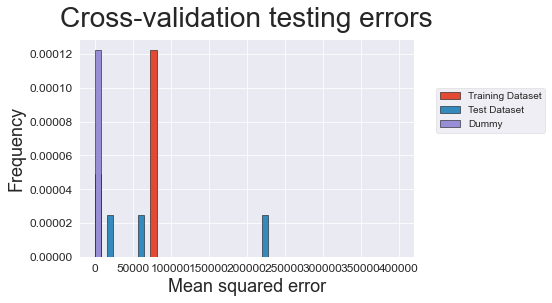

In [62]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
bins = np.linspace(start=0, stop=400000, num=50)
hist = cv_xg_boosting_results.plot.hist(bins=bins, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean squared error", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_ = plt.title("Cross-validation testing errors", size=28, y=1.03) # the underscore avoid to have a line of code displayed above the graph
plt.show()

In [63]:
pd.set_option("display.max_colwidth", -1) # display the whole cell for best hyperparameter column
xg_boosting_results = pd.DataFrame(['XGBoost', xg_boosting_time, g_xgboosting_param, optuna_xgboost_params, xg_boosting_train_mae, xg_boosting_test_mae, dummy_test_mae, xg_boosting_train_mse, xg_boosting_test_mse, optuna_xgboost_mse, dummy_test_mse, xg_boosting_train_rmse, xg_boosting_test_rmse, optuna_xgboost_rmse, dummy_test_rmse, xg_boosting_train_r2, xg_boosting_test_r2, dummy_test_r2]).transpose()
xg_boosting_results.columns = ['Method', 'Elapsed Time','GridSearch Hyperparameters', 'Optuna Hyperparameters', 'Training MAE', 'Test MAE', 'Dummy MAE', 'Training MSE', 'Test MSE', 'Optuna Test MSE', 'Dummy MSE', 'Training RMSE', 'Test RMSE', 'Optuna Test RMSE', 'Dummy RMSE', 'Training R2', 'Test R2', 'Dummy R2']
results = pd.concat([ridge_results, lr_results, grad_boosting_results, elastic_results, lasso_results, tree_results, rf_results, svr_results, bagging_results, xg_boosting_results], axis = 0).reset_index().drop(columns='index')
results.style.apply(lambda x: ['background: lightblue' if x.name == 'Optuna Test RMSE' else '' for i in x])

,Method,Elapsed Time,GridSearch Hyperparameters,Optuna Hyperparameters,Training MAE,Test MAE,Dummy MAE,Training MSE,Test MSE,Optuna Test MSE,Dummy MSE,Training RMSE,Test RMSE,Optuna Test RMSE,Dummy RMSE,Training R2,Test R2,Dummy R2
0,Ridge Regression,3.028826,{'alpha': 100},"{'fit_intercept': False, 'n_estimators': 579, 'tol': 0.2825618486769191, 'alpha': 888.7012356406703, 'solver': 'saga'}",188.447528,151.893995,116.981859,372918.896426,69478.566575,42325.020314,38134.369260,610.670858,263.587873,205.730455,195.280233,0.299012,-1.254431,-0.060177
1,Least Squares Regression,2.036846,nan,{'fit_intercept': True},195.099908,175.156568,116.981859,350320.866019,127603.141567,127603.141567,38134.369260,591.879097,357.215819,357.215819,195.280233,0.338990,-2.547507,-0.060177
2,Gradient Boosting,1.366051,"{'alpha': 0.85, 'learning_rate': 0.75, 'max_depth': 7, 'max_features': 12, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.5, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.39, 'n_estimators': 20}","{'learning_rate': 0.23378961212077706, 'n_estimators': 82, 'max_features': 17, 'alpha': 0.009123083656087418, 'max_leaf_nodes': 17, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0207440231260885, 'max_depth': 4, 'min_impurity_decrease': 0.38007778289289545, 'validation_fraction': 0.8126567395913075, 'n_iter_no_change': 9, 'tol': 2.8608104872529108}",78.519498,104.867995,116.981859,34759.932698,365558.443078,389519.196606,38134.369260,186.440158,604.614293,624.114730,195.280233,0.896016,0.258781,-0.060177
3,Elastic Net Regression,3.503230,{'alpha': 1000},"{'fit_intercept': False, 'n_estimators': 569, 'tol': 0.49967345726516027, 'alpha': 998.0244680374492, 'warm_start': False, 'selection': 'cyclic', 'l1_ratio': 0.9861489399181529}",167.956841,141.057650,116.981859,371160.075674,106128.656085,79022.048292,38134.369260,609.229083,325.773934,281.108606,195.280233,0.299669,-1.950492,-0.060177
4,Lasso Regression,3.094204,{'alpha': 1},"{'fit_intercept': False, 'n_estimators': 67, 'tol': 0.36704206611664186, 'alpha': 756.5015812057887, 'warm_start': True, 'selection': 'cyclic'}",191.471066,166.415506,116.981859,351370.233496,117303.664817,79238.866427,38134.369260,592.764906,342.496226,281.493990,195.280233,0.337010,-2.261170,-0.060177
5,Decision Trees Regressor,0.042127,"{'max_depth': 7, 'max_features': 20, 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.685, 'min_samples_leaf': 3, 'min_samples_split': 4}","{'max_features': 4, 'max_leaf_nodes': 2, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.10387502487294888, 'max_depth': 5, 'min_impurity_decrease': 0.621614616467458, 'splitter': 'best', 'min_samples_split': 18}",0.000000,97.142096,116.981859,0.000000,248947.817052,37094.528879,38134.369260,0.000000,498.946708,192.599400,195.280233,1.000000,-5.921021,-0.060177
6,Random Forest,2.255679,"{'max_depth': 8, 'max_features': 10, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.65, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 250}","{'n_estimators': 49, 'max_features': 16, 'max_leaf_nodes': 25, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.06340038833309806, 'max_depth': 6, 'min_impurity_decrease': 0.8818018101967287, 'min_samples_split': 10, 'max_samples': 43, 'bootstrap': True}",46.079375,88.450373,116.981859,65711.188813,100126.627770,27479.121054,38134.369260,256.341937,316.427919,165.768275,195.280233,0.876012,-1.783630,-0.060177
7,SVR,11.224057,"{'C': 200, 'degree': 1, 'kernel': 'poly'}","{'gamma': 'scale', 'verbose': True, 'C': 99.3051783017924, 'epsilon': 0.2072652721107602, 'shrinking': True}",104.530854,64.591326,116.981859,466213.610472,27688.119168,26505.111942,38134.369260,682.798367,166.397473,162.803906,195.280233,0.120315,0.230240,-0.060177
8,Bagging Regressor,1.243318,"{'max_features': 30, 'max_samples': 100, 'n_estimators': 200}","{'n_estimators': 73, 'max_features': 29, 'max_samples': 20, 'bootstrap': False, 'bootstrap_features': False, 'warm_start': False}",42.721434,81.382238,116.98185

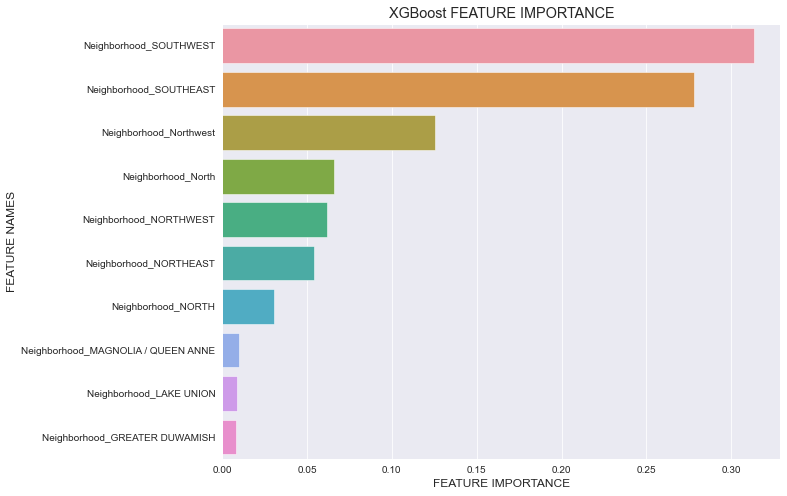

In [64]:
# features importance for random forest
plt.style.use('ggplot')
sns.set_style('darkgrid')
plot_feature_importance(xg_boosting.feature_importances_,X.columns,'XGBoost')
plt.savefig('xgboostfeatures.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Statistical Results

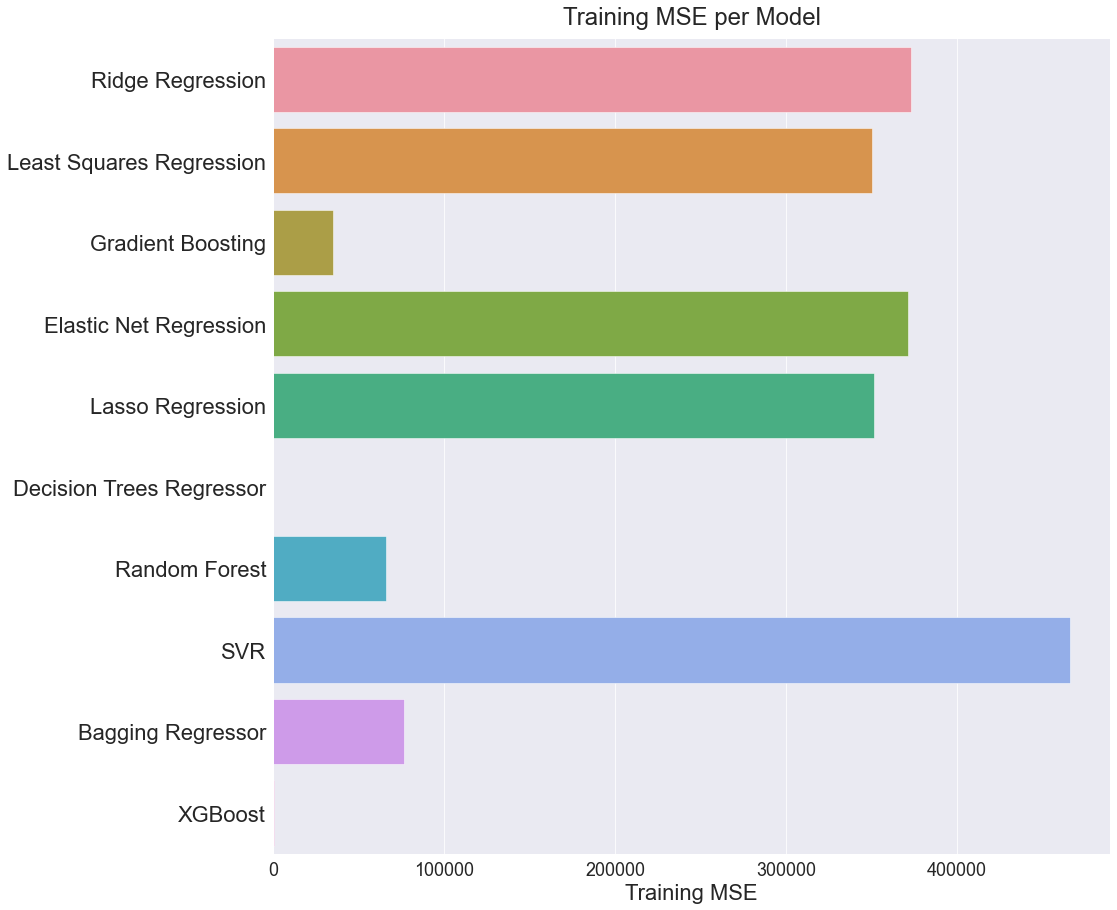

In [65]:
# Training MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training MSE per Model", size=24, y=1.01)
plt.xlabel("Training MSE", size=22)
plt.savefig('msetrain.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

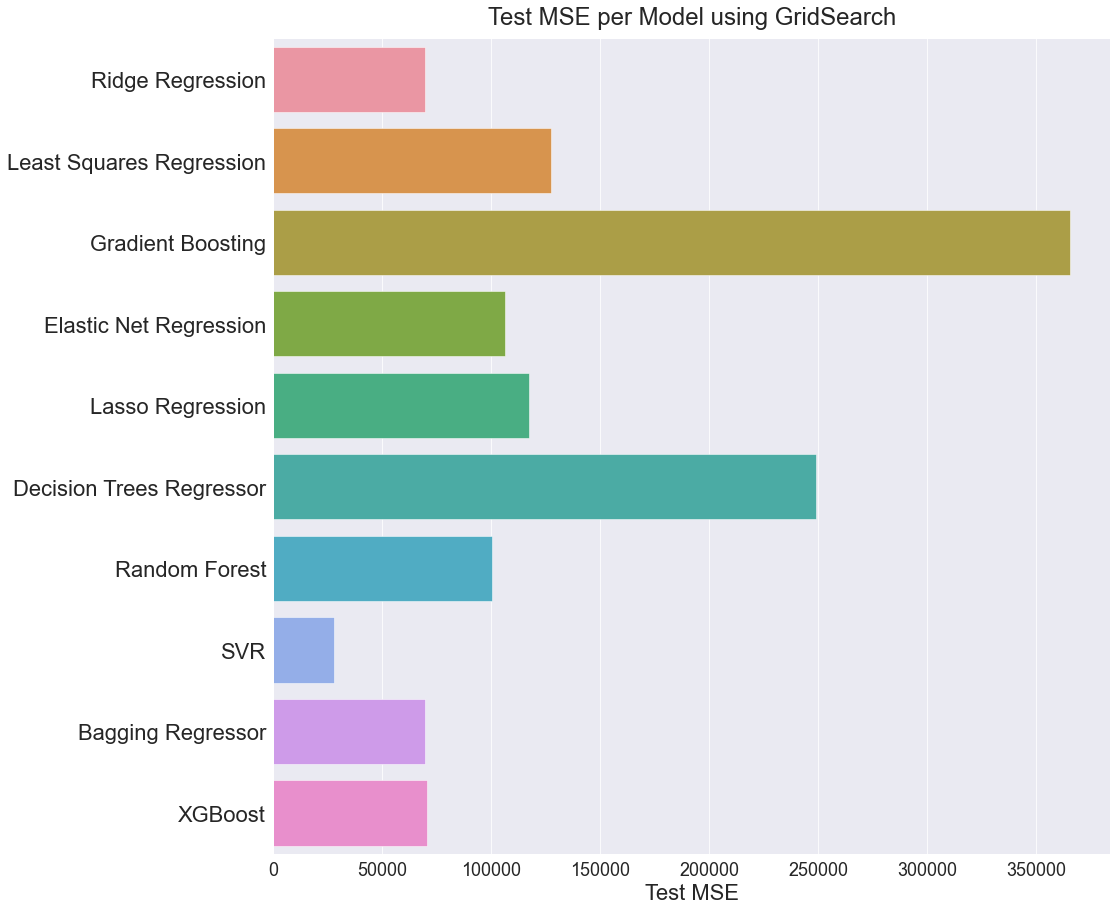

In [66]:
# Test MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model using GridSearch", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)
plt.savefig('msetestgrid.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

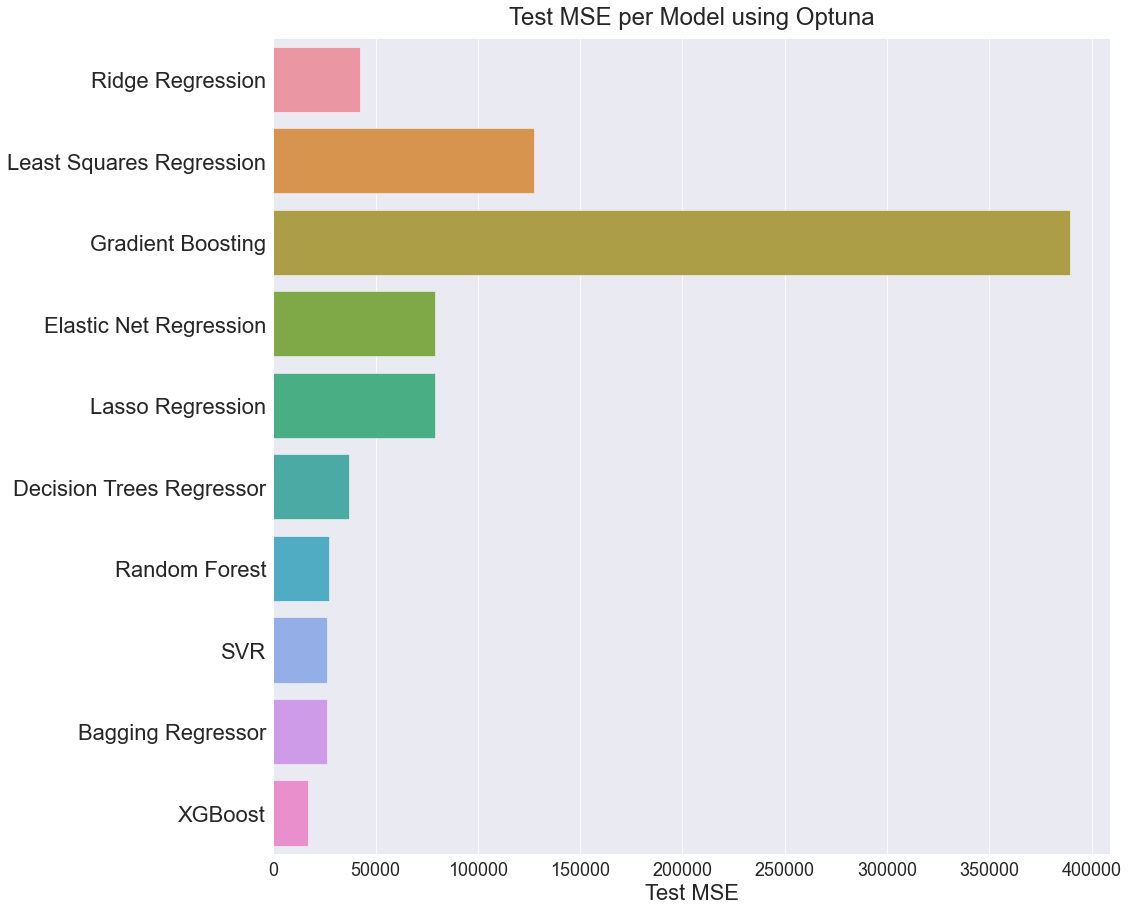

In [67]:
# Test MSE

fig = plt.figure(figsize =([15, 15]))
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Optuna Test MSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test MSE per Model using Optuna", size=24, y=1.01)
plt.xlabel("Test MSE", size=22)
plt.savefig('msetestoptuna.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

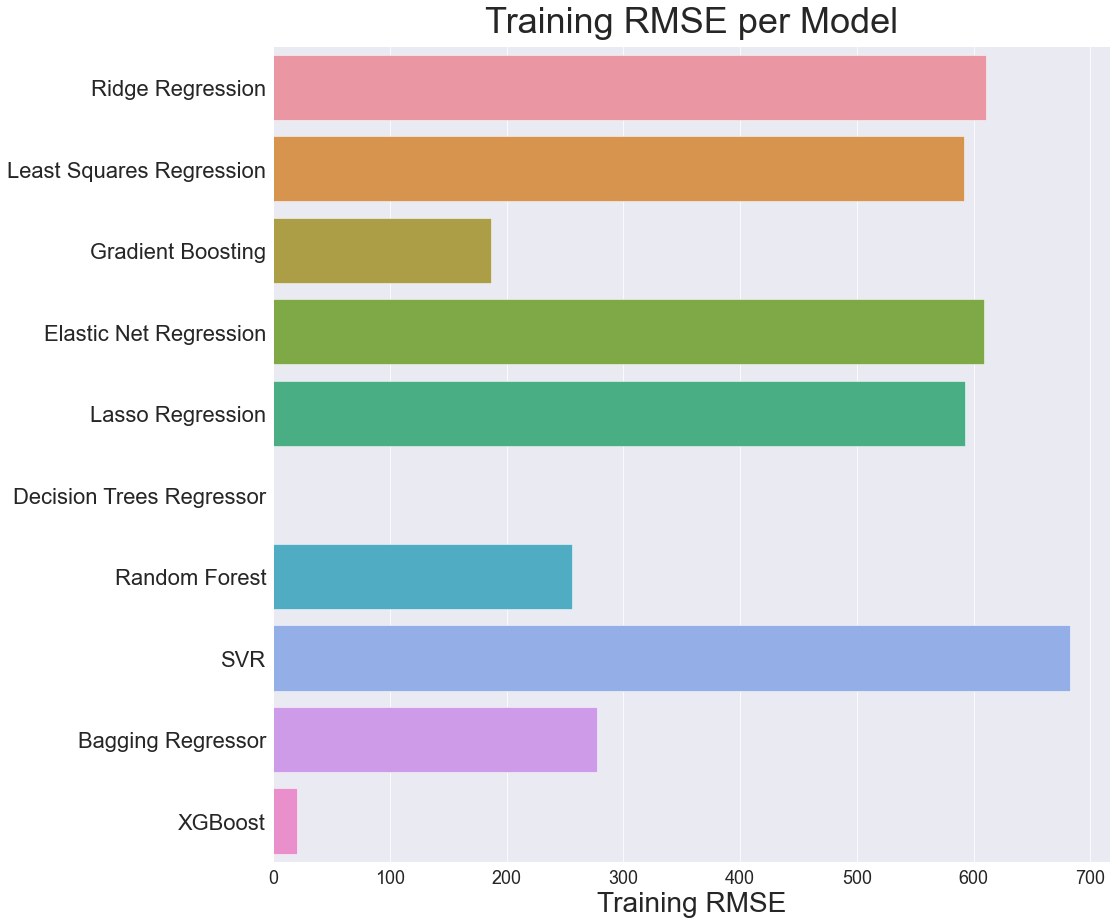

In [68]:
# Training RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Training RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Training RMSE per Model", size=36, y=1.01)
plt.xlabel("Training RMSE", size=28)
plt.savefig('rmsetrain.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

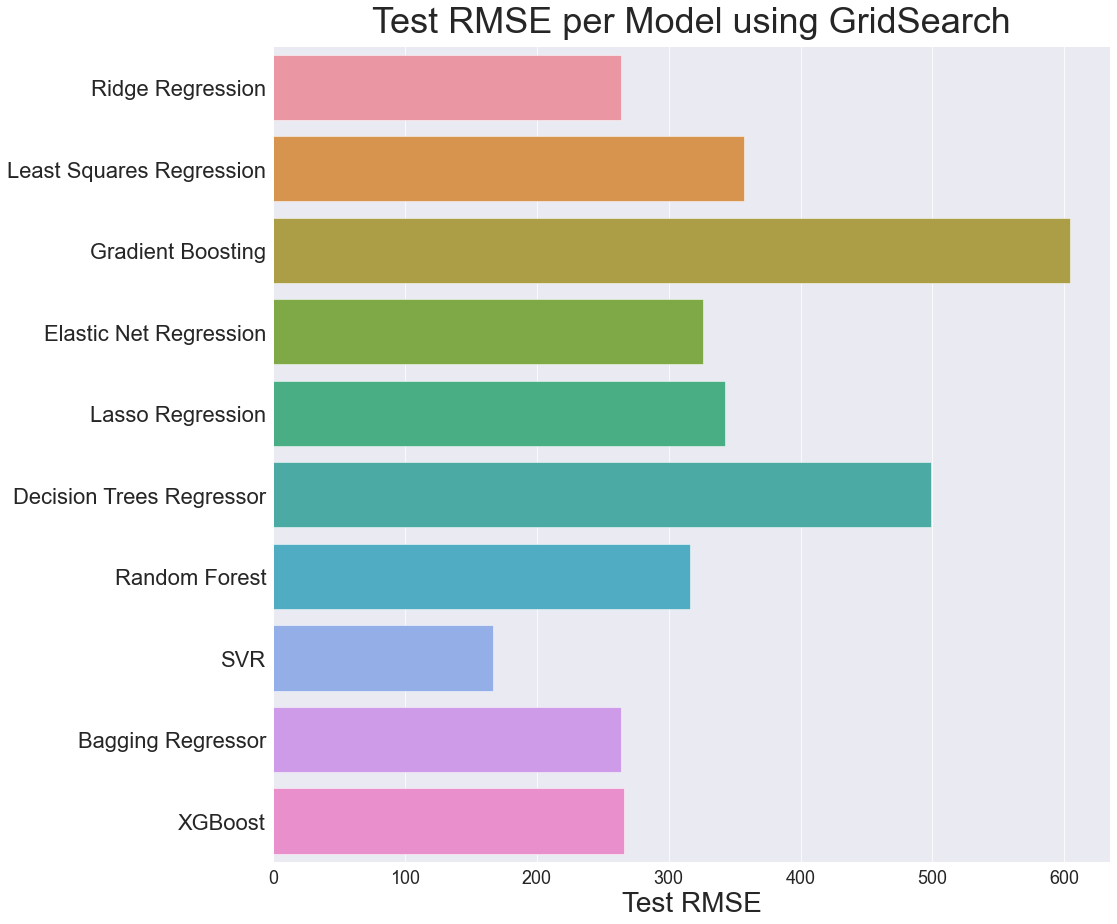

In [69]:
# Test RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model using GridSearch", size=36, y=1.01)
plt.xlabel("Test RMSE", size=28)
plt.savefig('rmsetestgrid.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

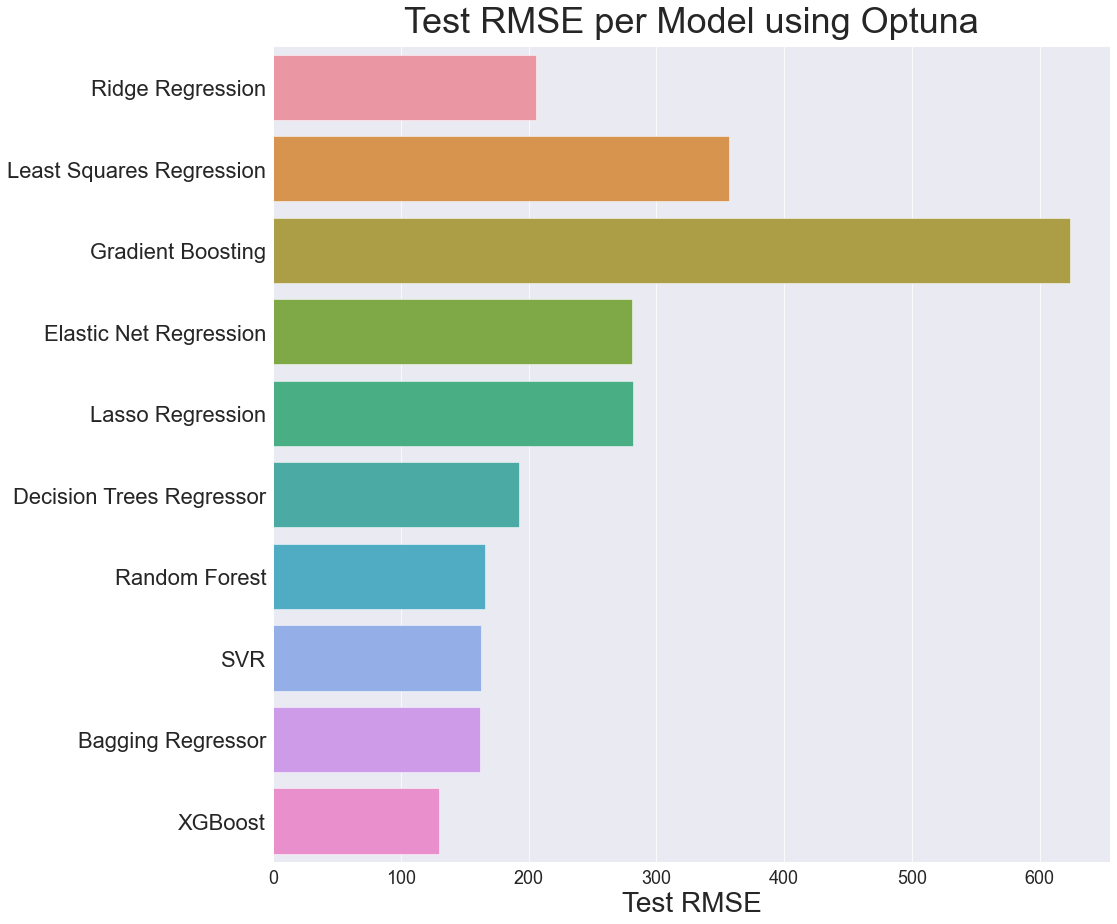

In [70]:
# Test RMSE

fig = plt.figure(figsize =([15, 15])) 
plt.style.use('ggplot')
sns.set_style('darkgrid')
splot = sns.barplot(data=results, x=results["Optuna Test RMSE"], y=results["Method"], orient = 'h').set(ylabel=None)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
plt.title("Test RMSE per Model using Optuna", size=36, y=1.01)
plt.xlabel("Test RMSE", size=28)
plt.savefig('rmsetestoptuna.png', dpi=300, format='png', bbox_inches='tight') # don't crop the legend while saving the figure
plt.show()

# Final Model Decision

The **XGBoost model** returns us with the best accuracy on the Test Set using Optuna hyperparameter based on MSE and RMSE metrics. We use a the feature importance attribute to notice the importance of the *ENERGYSTARScore* and we can see that the variable scores far from the top 10 variables which make it not important in the decision of the model design. 